In [2]:
import torch as th
import numpy as np

In [4]:
hidden_activations = th.load("./activations/hidde_activations_2023_29_06_19_21.pt")
output_activations = th.load("./activations/output_activation2023_29_06_19_21.pt")
predicted = th.load("./predicted/predicted_labels2023_29_06_19_21.pt")

hidden_activations = hidden_activations.numpy()
output_activations = output_activations.numpy()
predicted = predicted.numpy()

## Plot


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

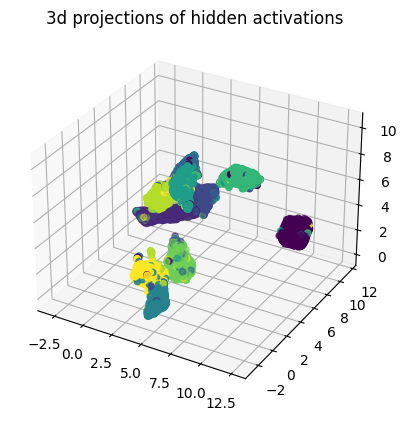

In [9]:
from src.plot_manifold import plot_manifold

plot_manifold(
    data=hidden_activations,
    n_components=3,
    predicted=predicted,
    title="3d projections of hidden activations",
)

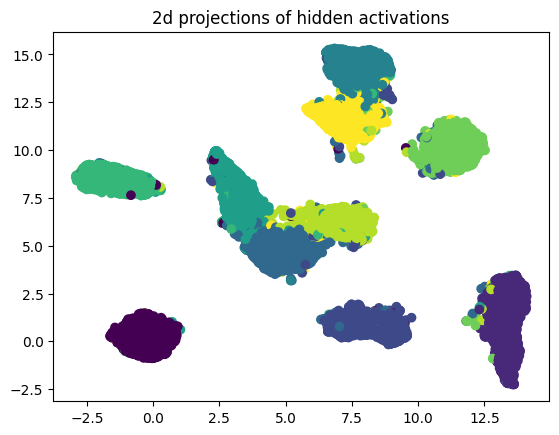

In [10]:
from src.plot_manifold import plot_manifold

plot_manifold(
    data=hidden_activations,
    n_components=2,
    predicted=predicted,
    title="2d projections of hidden activations",
)

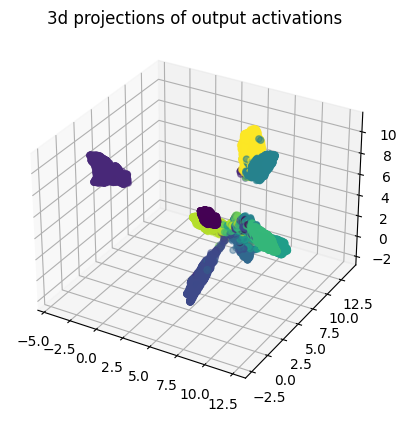

In [11]:
from src.plot_manifold import plot_manifold

plot_manifold(
    data=output_activations,
    n_components=3,
    predicted=predicted,
    title="3d projections of output activations",
)

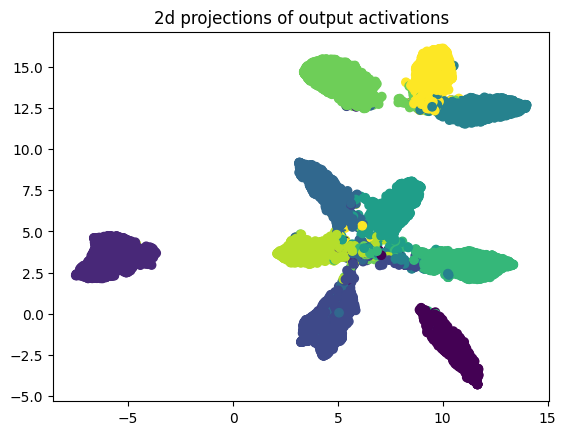

In [12]:
from src.plot_manifold import plot_manifold

plot_manifold(
    data=output_activations,
    n_components=2,
    predicted=predicted,
    title="2d projections of output activations",
)

### Weights analysis


In [13]:
# plot umap for weights
weights_first_layer.T.shape

(784, 100)

In [14]:
weights_second_layer.shape

(10, 100)

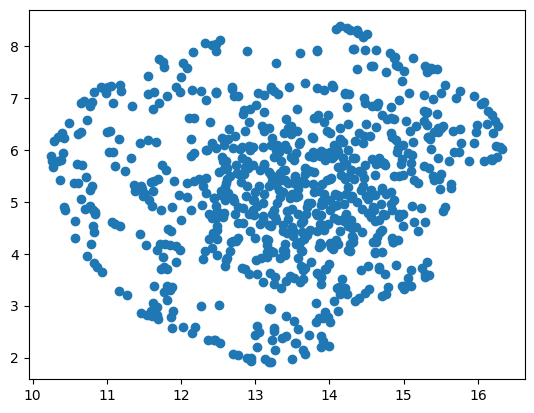

In [15]:
plot_manifold(data=weights_first_layer.T, n_components=2, predicted=None)

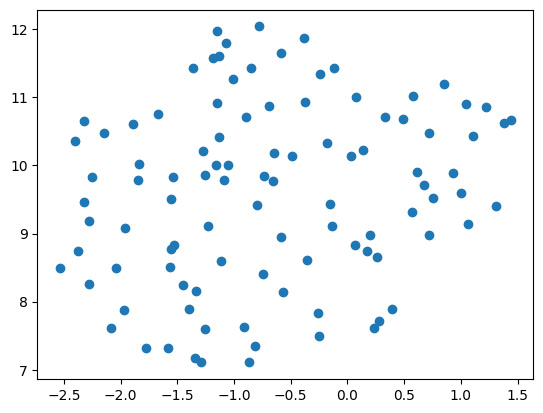

In [16]:
plot_manifold(data=weights_second_layer.T, n_components=2, predicted=None)

## Compute persistence


usetex mode requires TeX.


[1]


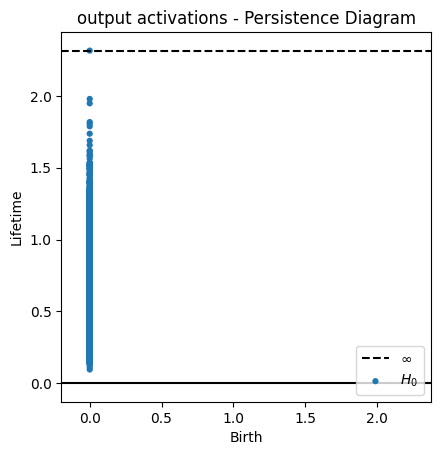

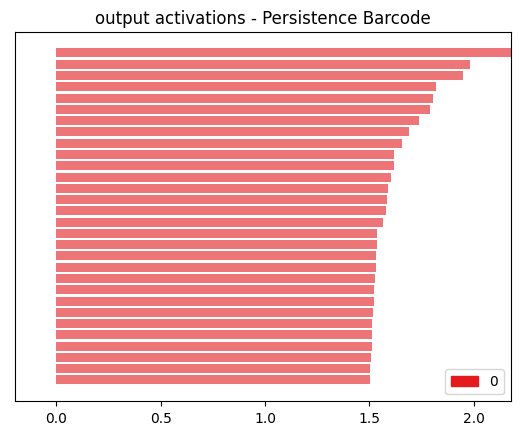

In [17]:
from src.compute_persistent_hom import compute_persistent_hom

compute_persistent_hom(data=output_activations, thresh=40, title="output activations")

[1]


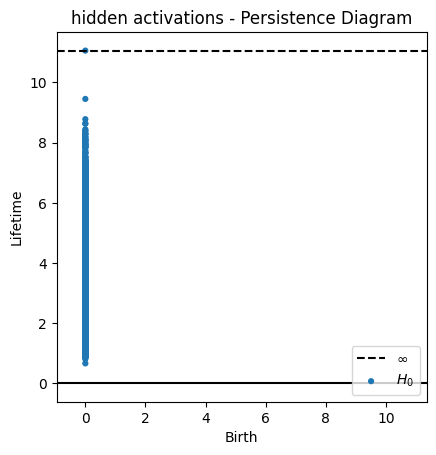

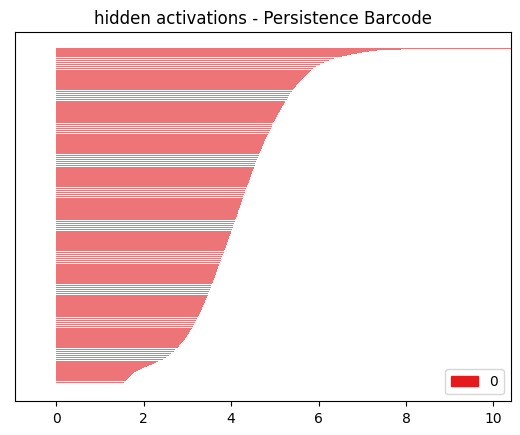

In [18]:
compute_persistent_hom(data=hidden_activations, thresh=40, title="hidden activations")

## Compute mapper

It performs mapper algorithm and return:

- a html file inside mapper_outputs folder to see the resulting graph
- indexes_from_cluster_output, data_from_cluster_output variables, which stores respectively:
  - the indexes of the test point in each cluster
  - the activations (so a vector of 10 or 100 elements, depending if outputor hidden) of the test point in each cluster


In [3]:
from src.compute_mapper import compute_mapper

indexes_from_cluster_output, data_from_cluster_output = compute_mapper(
    data=output_activations, title="output activations"
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: max
	Distance matrices: None
	Scalers: StandardScaler()
..Projecting on data shaped (10000, 10)

..Projecting data using: max

..Scaling with: StandardScaler()

Mapping on data shaped (10000, 10) using lens shaped (10000, 1)

Creating 1 hypercubes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Created 0 edges and 10 nodes in 0:00:03.892743.
Wrote visualization to: mapper_outputs/2023-06-29 19:12:15.960566.html


In [20]:
indexes_from_cluster_hidden, data_from_cluster_hidden = compute_mapper(
    data=hidden_activations, title="hidden activations"
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: max
	Distance matrices: None
	Scalers: StandardScaler()
..Projecting on data shaped (10000, 100)

..Projecting data using: max

..Scaling with: StandardScaler()

Mapping on data shaped (10000, 100) using lens shaped (10000, 1)

Creating 1 hypercubes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Created 0 edges and 10 nodes in 0:00:04.690242.
Wrote visualization to: mapper_outputs/2023-06-29 12:08:15.073472.html


Verify the correspondenece in the clusters in the output layer: take the output activations of the test points and with the clusters obtained by applying mapper algorithm, within each cluster take the ground truth labels and check if there are dominant labels within each cluster.


In [21]:
for i in range(10):
    labels, freq = np.unique(
        predicted[indexes_from_cluster_output[i]], return_counts=True
    )
    print(
        f"CLUSTER {i}. Labels:{labels}. Frequency: {freq} ---> Cluster {i} associated with label {labels[np.argmax(freq)]} with prob. {100*np.max(freq)/np.sum(freq)}%"
    )

CLUSTER 0. Labels:[0 2 3 4 5 7 8 9]. Frequency: [ 15 145 326   1  53   9 686   4] ---> Cluster 0 associated with label 8 with prob. 55.367231638418076%
CLUSTER 1. Labels:[0 2 3 7 8 9]. Frequency: [  3   4   9 802   1  17] ---> Cluster 1 associated with label 7 with prob. 95.93301435406698%
CLUSTER 2. Labels:[1 2 3 4 6 7 8 9]. Frequency: [1115   67   16    1    1   59   18    6] ---> Cluster 2 associated with label 1 with prob. 86.90568978955572%
CLUSTER 3. Labels:[0 1 2 4 5 6 7 8 9]. Frequency: [  3   1   7 796   5   1  71   1 842] ---> Cluster 3 associated with label 9 with prob. 48.75506658946149%
CLUSTER 4. Labels:[0 2 8]. Frequency: [770   4   4] ---> Cluster 4 associated with label 0 with prob. 98.97172236503856%
CLUSTER 5. Labels:[2 3 5 7 8]. Frequency: [676   6   2   1   1] ---> Cluster 5 associated with label 2 with prob. 98.54227405247813%
CLUSTER 6. Labels:[0 3 5 8]. Frequency: [  1   2 562  16] ---> Cluster 6 associated with label 5 with prob. 96.72977624784853%
CLUSTER 7. L

### Next step

Prendo i cluster dati da mapper nell output layer.
Per ogni cluster, prendo gli indici dei test point che stanno in que cluster (indexes_from_cluster_output).

Poi, vado a vedere le hidden activations per questi testpoint che stanno dentro lo stesso cluster.


Sono localizzate... bene!
Andiamo a vedere per il cluster 0 quali sono i neuroni corrispondenti


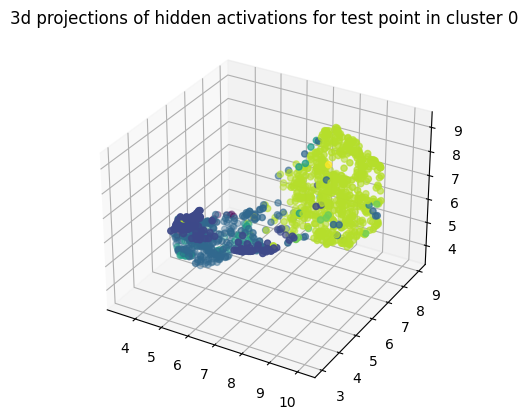

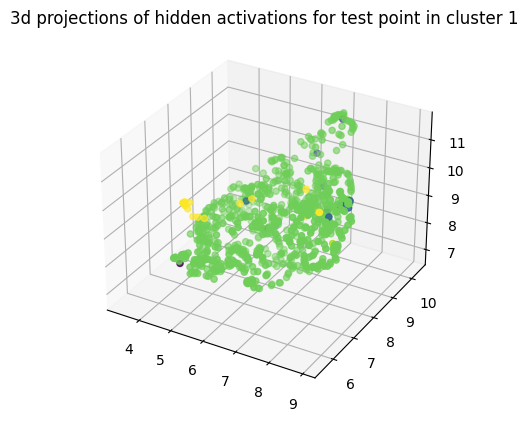

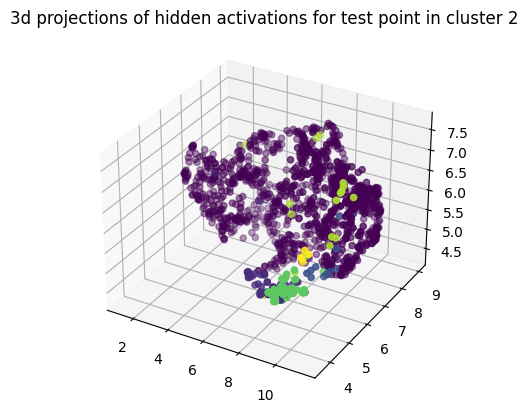

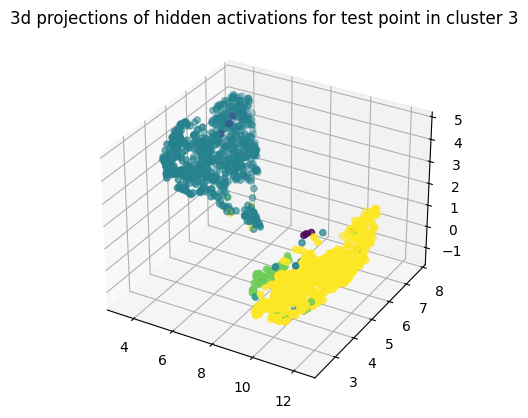

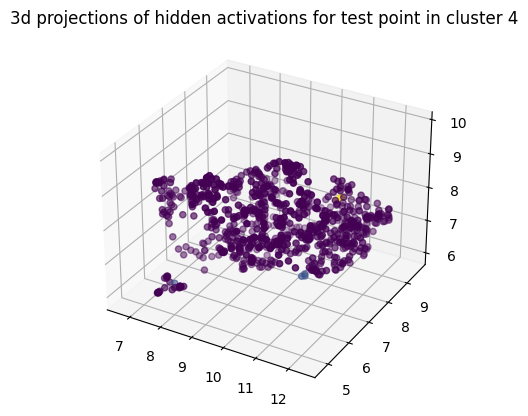

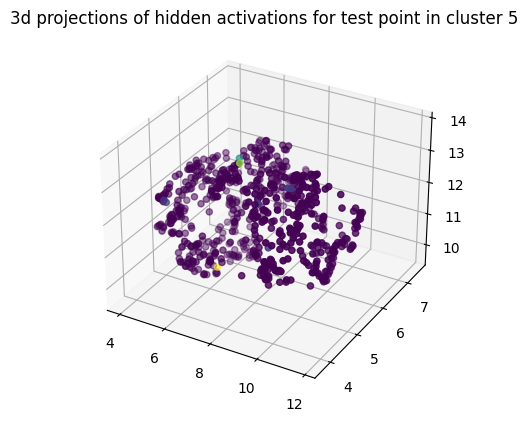

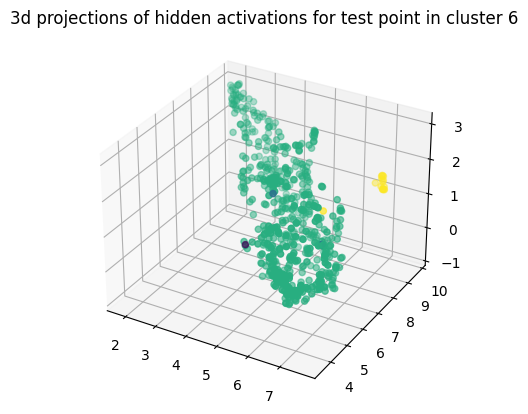

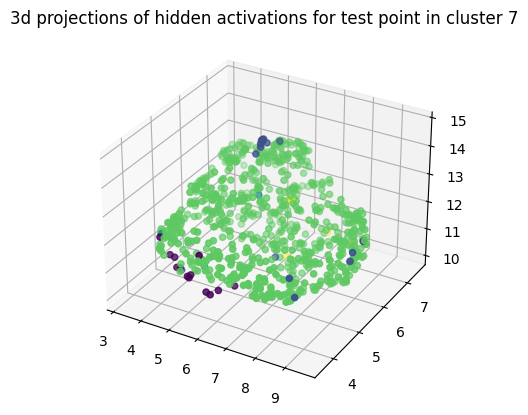

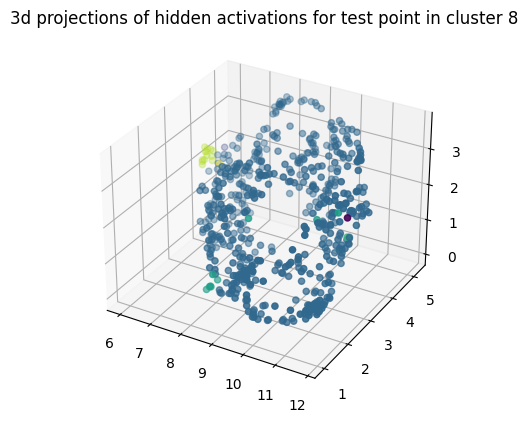

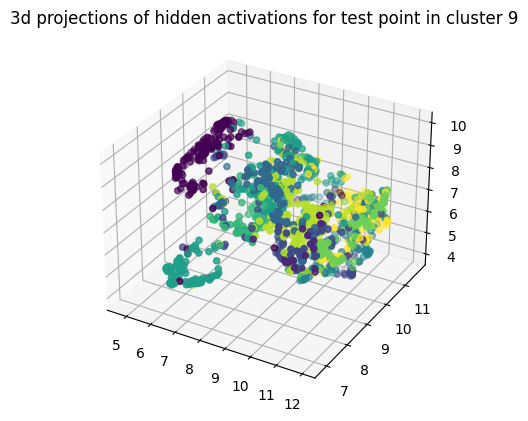

In [22]:
# store the hidden activations for each of the 10 cluster:
hidden_activ_per_clusters = []

for i in range(10):
    # indexes_from_cluster_output[i]

    # seleziono le hidden activation dei test point corrispondenti
    hidden_activ_per_clusters.append(hidden_activations[indexes_from_cluster_output[i]])

    plot_manifold(
        data=hidden_activations[indexes_from_cluster_output[i]],
        title=f"3d projections of hidden activations for test point in cluster {i}",
        predicted=predicted[indexes_from_cluster_output[i]],
    )
    plt.show()

In [23]:
MAPPER = hidden_activ_per_clusters

In [24]:
for i in range(len(hidden_activ_per_clusters)):
    print(f"mean for cluster {i}: ", np.mean(hidden_activ_per_clusters[i]))
    print(f"std for cluster {i}: ", np.std(hidden_activ_per_clusters[i]))

mean for cluster 0:  0.77241236
std for cluster 0:  1.9445385
mean for cluster 1:  0.6684754
std for cluster 1:  2.0491436
mean for cluster 2:  0.71692973
std for cluster 2:  1.7672511
mean for cluster 3:  0.7914287
std for cluster 3:  1.9898652
mean for cluster 4:  0.20195152
std for cluster 4:  2.8377967
mean for cluster 5:  0.552601
std for cluster 5:  2.4595382
mean for cluster 6:  0.6983327
std for cluster 6:  2.1148977
mean for cluster 7:  0.48945025
std for cluster 7:  2.2590456
mean for cluster 8:  0.8030148
std for cluster 8:  2.1614487
mean for cluster 9:  0.53090364
std for cluster 9:  1.773565


Ora:

- per ogni cluster:
  - per ogni elemento in un cluster:
    - considero le sue hidden activations e seleziono gli indexes delle 5 attivazioni piu grandi (che corrispondono ai neuroni dell'hidden layer che si attivano di piu per i test point che poi vanno a finire in quel cluster)


In [25]:
DICT = [[] for _ in range(10)]
for i in range(10):
    for j in range(hidden_activ_per_clusters[i].shape[0]):
        DICT[i].append(hidden_activ_per_clusters[i][j].argsort()[-5:][::-1])

In [26]:
DICT_MAPPER = DICT

in DICT[0] c'è il seguente: \
ci sono le top 5 HIDDEN activations per ogni test point che sta dentro il cluster 0.


In [27]:
unique_values = []  # gli interi qui dentro corrispondono all'ID di un neurone
frequencies = []

for i in range(10):
    values, counts = np.unique(np.stack(DICT[i]).flatten(), return_counts=True)
    unique_values.append(values)
    frequencies.append(counts)

in unique_values[0], frequencies[0] ci sono gli indici degli hidden layer che sono collegati a un qualce test point nel cluster 0, con relative frequenze.

Alla fine della fiera questo è cio che succede: \
faccio i cluster con mapper \
prendo il primo cluster (cluster 0) \
ritrovo i test point che appartengono a quel cluster \
per ogni test point, ritrovo le 5 hidden activation piu alte collegate a quel test point, e questo lo faccio per ogni test point nel cluster (cluster 0) \
alla fine conto le frequenze di questi neuroni nell'hidden layer per vedere se c'è qualche pattern: cluster 0-neuroni nell hidden layer che vengono attiavti piu di frequente.


In [28]:
LIST = []
for i in range(10):
    idxs = list(frequencies[i].argsort()[-5:][::-1])
    LIST.append(unique_values[i][idxs])

LIST

[array([51, 25, 98, 89, 76]),
 array([51,  8, 68, 64,  9]),
 array([15, 23,  5,  8, 98]),
 array([51, 68, 25, 31, 77]),
 array([77,  1, 55, 76, 51]),
 array([76, 25, 30, 77, 98]),
 array([51, 88, 25, 55, 13]),
 array([25, 41, 65,  1, 77]),
 array([98, 76, 51, 89, 66]),
 array([51, 25, 68, 65, 77])]

### Some resulting plot


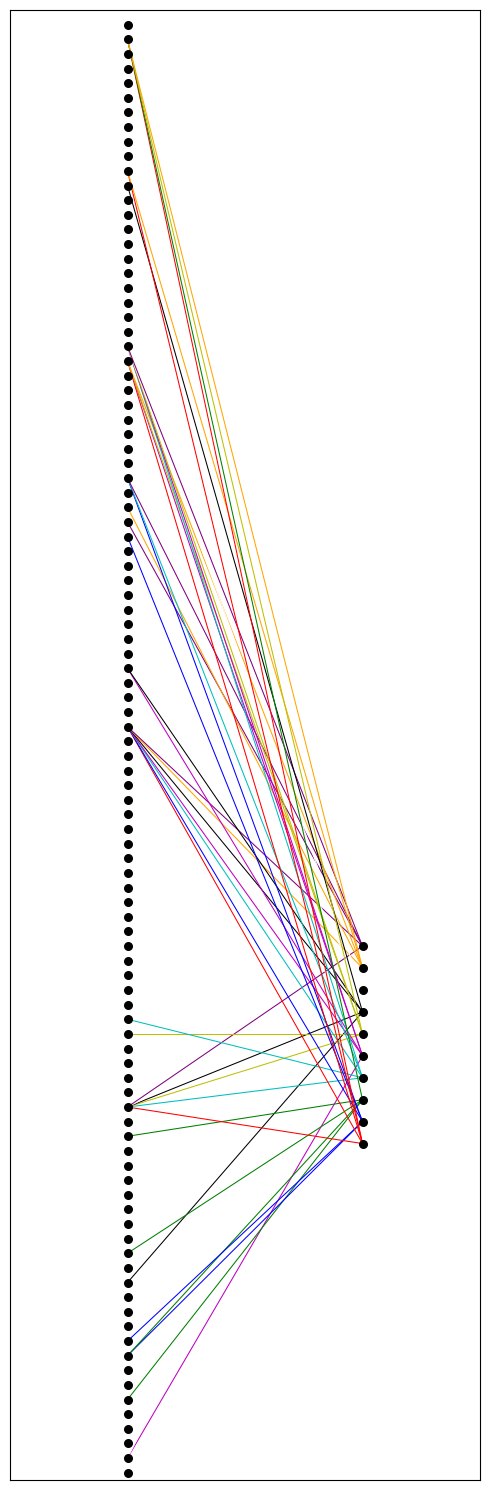

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes with positions (0, 1) to (99, 1)
for x in range(100):
    G.add_node(x, pos=(0, 2 * x))

# Add nodes with positions (0, 0) to (9, 0)
for x in range(10):
    G.add_node(x + 100, pos=(1, 45 + 3 * x))

# Extract positions from node attributes
node_positions = {node: data["pos"] for node, data in G.nodes(data=True)}

colors = ["r", "b", "g", "c", "m", "y", "k", "w", "orange", "purple"]
for i, edges in enumerate(LIST):
    for edge in edges:
        G.add_edge(100 + i, edge, color=colors[i])

colors = nx.get_edge_attributes(G, "color").values()

# Draw the graph
plt.figure(figsize=(5, 15))
nx.draw_networkx_nodes(G, pos=node_positions, node_color="black", node_size=30)
nx.draw_networkx_edges(G, pos=node_positions, edge_color=colors, width=0.75)

# Set axis labels and limits
plt.ylim(-1, 200)
plt.xlim(-0.5, 1.5)

# Show the graph
plt.tight_layout()
plt.show()

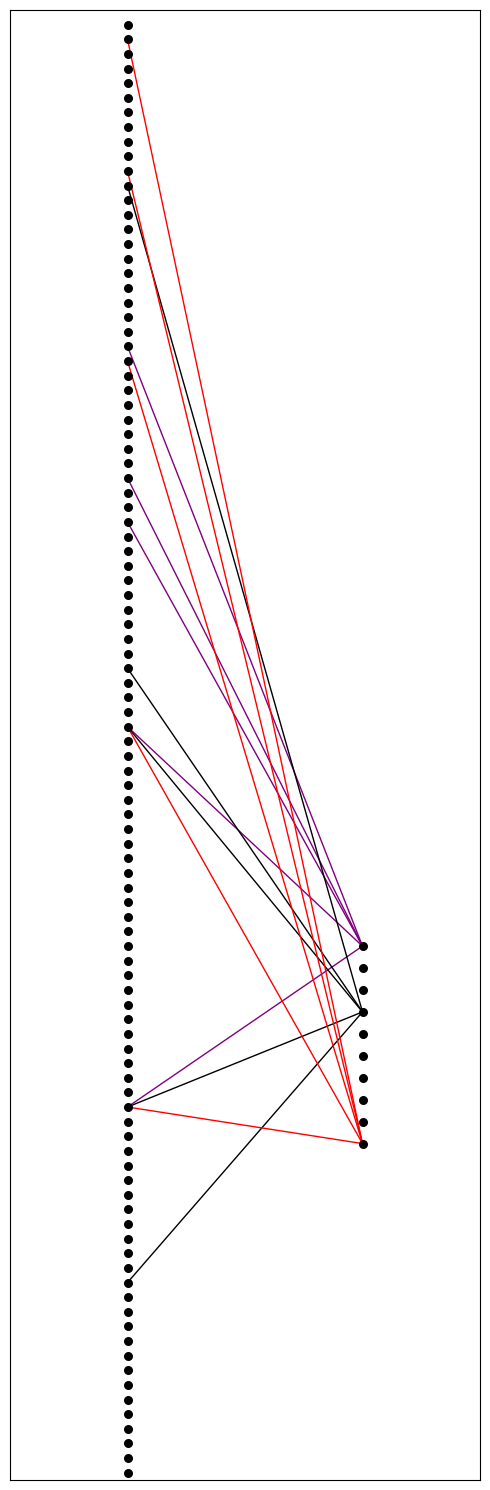

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes with positions (0, 1) to (99, 1)
for x in range(100):
    G.add_node(x, pos=(0, 2 * x))

# Add nodes with positions (0, 0) to (9, 0)
for x in range(10):
    G.add_node(x + 100, pos=(1, 45 + 3 * x))

# Extract positions from node attributes
node_positions = {node: data["pos"] for node, data in G.nodes(data=True)}

colors = ["r", "b", "g", "c", "m", "y", "k", "w", "orange", "purple"]
for i, edges in enumerate(LIST):
    if i == 0 or i == 6 or i == 9:
        for edge in edges:
            G.add_edge(100 + i, edge, color=colors[i])

colors = nx.get_edge_attributes(G, "color").values()

# Draw the graph
plt.figure(figsize=(5, 15))
nx.draw_networkx_nodes(G, pos=node_positions, node_color="black", node_size=30)
nx.draw_networkx_edges(G, pos=node_positions, edge_color=colors, width=1)

# Set axis labels and limits
plt.ylim(-1, 200)
plt.xlim(-0.5, 1.5)

# Show the graph
plt.tight_layout()
plt.show()

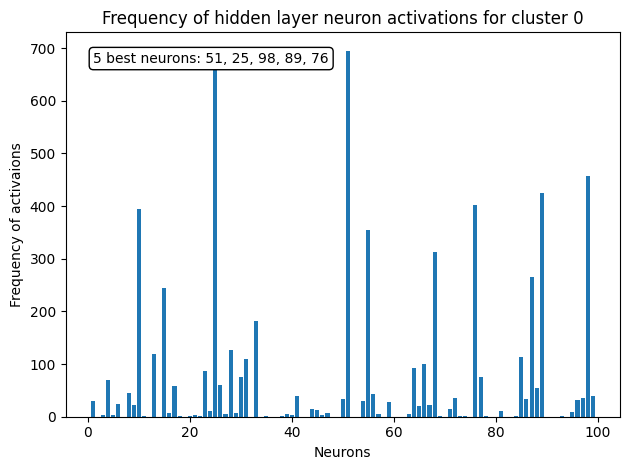

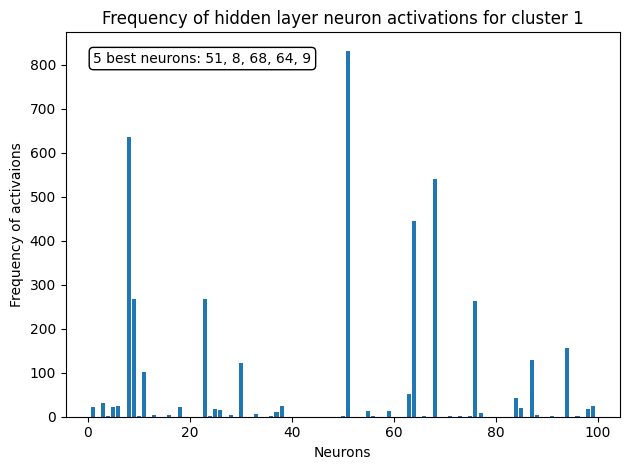

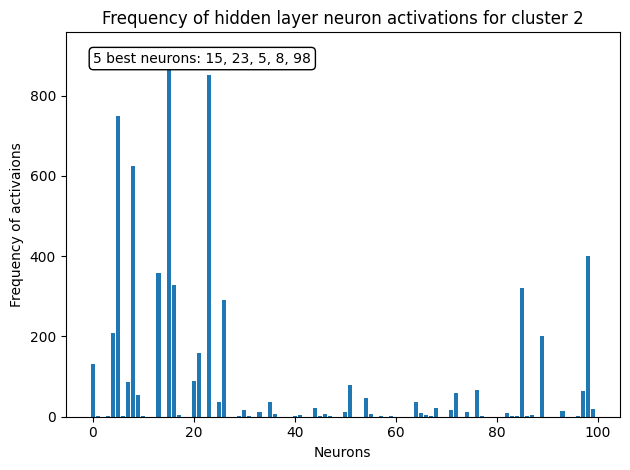

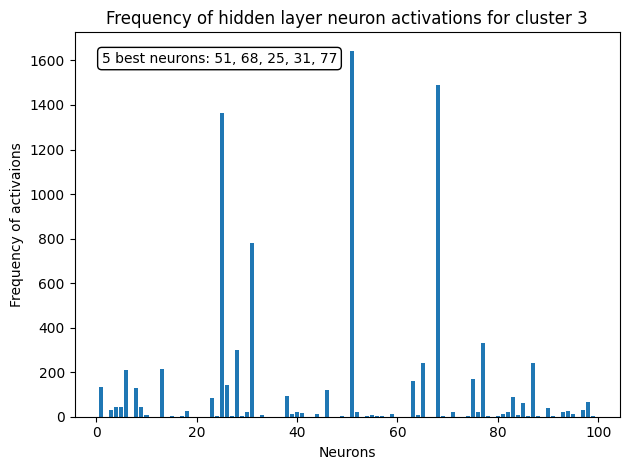

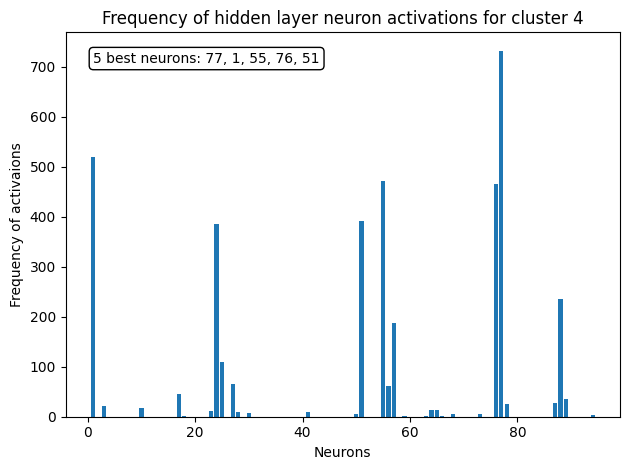

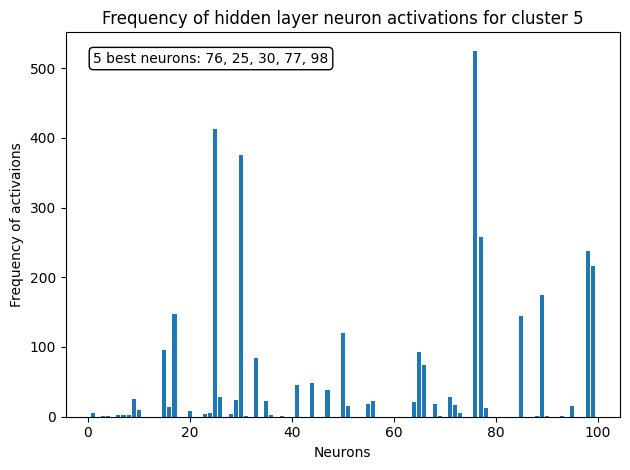

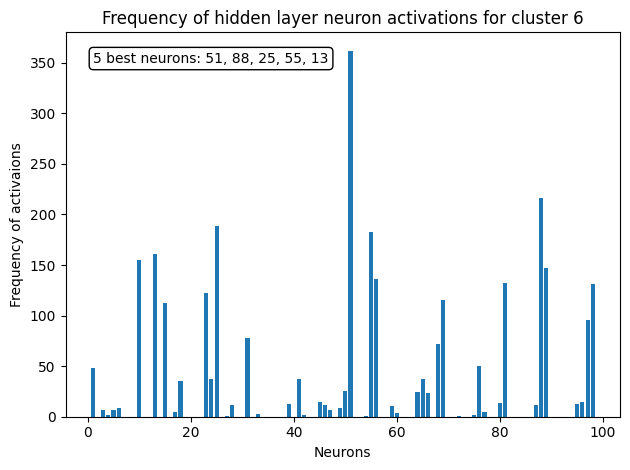

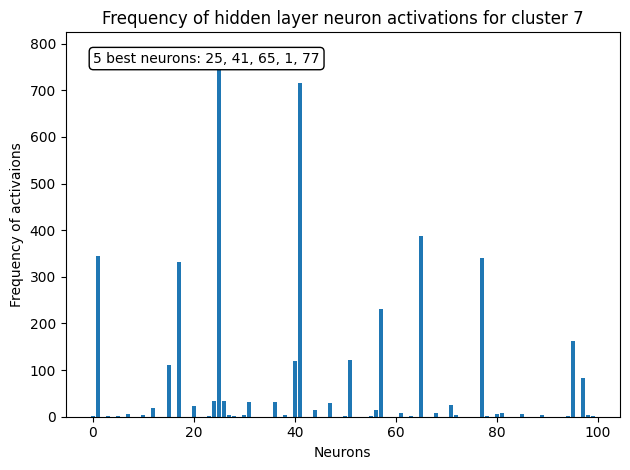

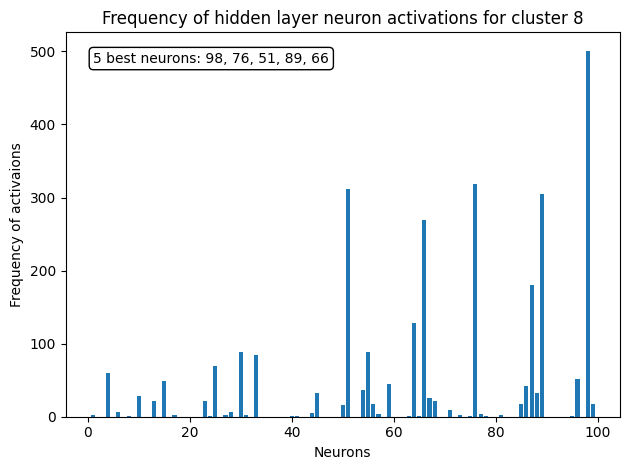

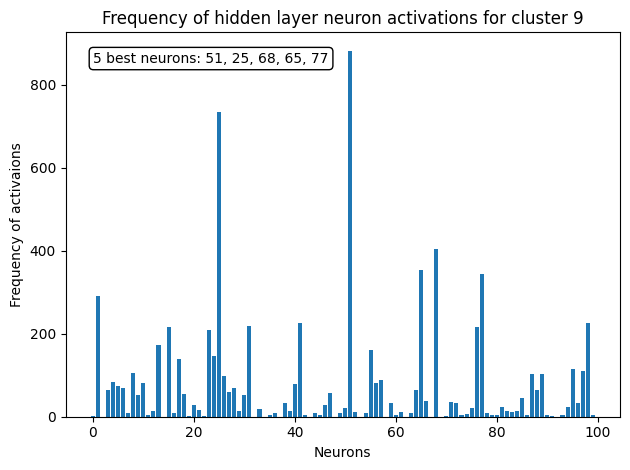

In [31]:
# plot barplot

import matplotlib.pyplot as plt

for i in range(10):
    # Plotting bar chart
    plt.bar(unique_values[i], frequencies[i])

    # Adding labels and title
    plt.xlabel("Neurons")
    plt.ylabel("Frequency of activaions")
    plt.title(f"Frequency of hidden layer neuron activations for cluster {i}")

    # Getting the indices of the five most frequent neurons
    top_indices = frequencies[i].argsort()[-5:][::-1]
    top_neurons = unique_values[i][top_indices]

    # Creating the text to display
    text = "5 best neurons: " + ", ".join(map(str, top_neurons))

    # Adding the text to the plot
    plt.text(
        0.05,
        0.95,
        text,
        transform=plt.gca().transAxes,
        ha="left",
        va="top",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round"),
    )

    plt.tight_layout()

    # Display the plot
    plt.show()

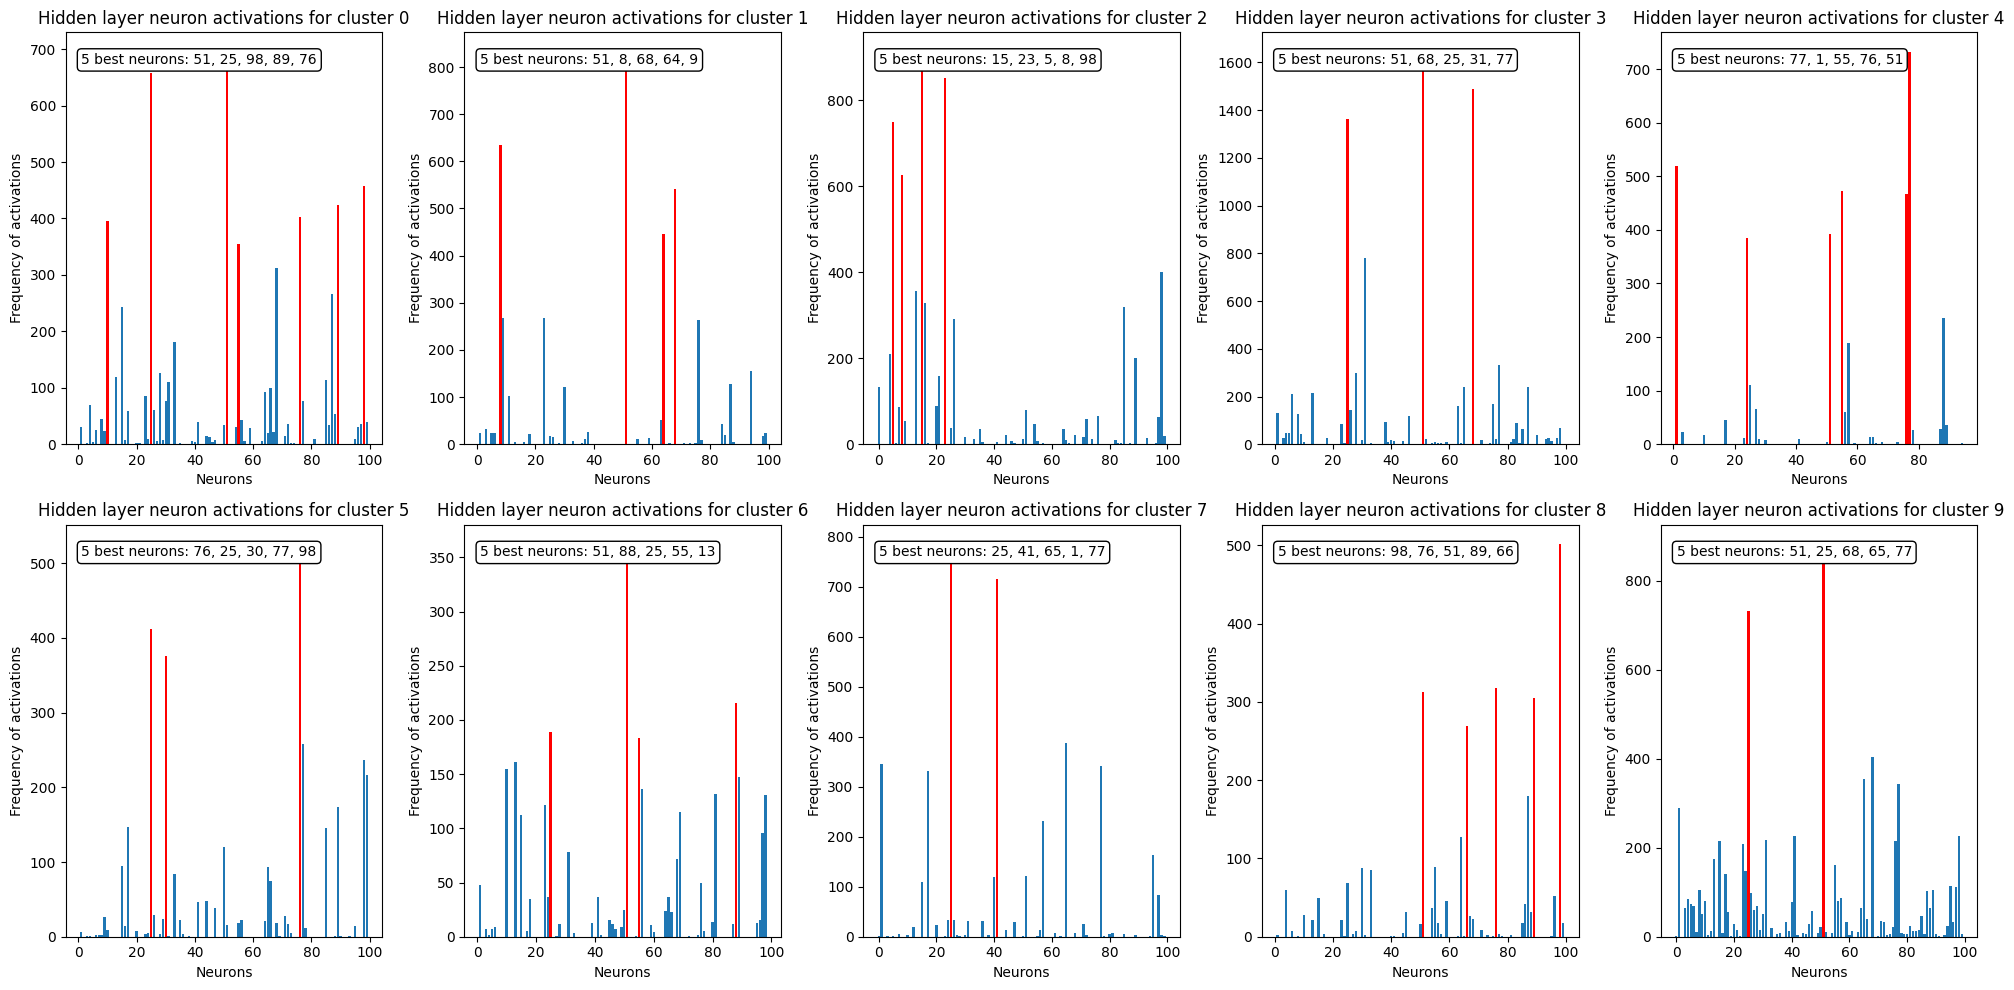

In [32]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    # Determine the position in the subplot grid
    row = i // 5
    col = i % 5

    # Select the appropriate subplot
    ax = axs[row, col]

    threshold = (1 / 2) * (max(frequencies[i]) - min(frequencies[i]))
    # Plotting bar chart
    ax.bar(unique_values[i], frequencies[i])

    # Highlight the bar that reaches or exceeds the threshold
    for j, freq in enumerate(frequencies[i]):
        if freq >= threshold:
            ax.bar(unique_values[i][j], freq, color="red")

    # Adding labels and title
    ax.set_xlabel("Neurons")
    ax.set_ylabel("Frequency of activations")
    ax.set_title(f"Hidden layer neuron activations for cluster {i}")

    # Getting the indices of the five most frequent neurons
    top_indices = frequencies[i].argsort()[-5:][::-1]
    top_neurons = unique_values[i][top_indices]

    # Creating the text to display
    text = "5 best neurons: " + ", ".join(map(str, top_neurons))

    # Adding the text to the plot
    ax.text(
        0.05,
        0.95,
        text,
        transform=ax.transAxes,
        ha="left",
        va="top",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round"),
    )


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

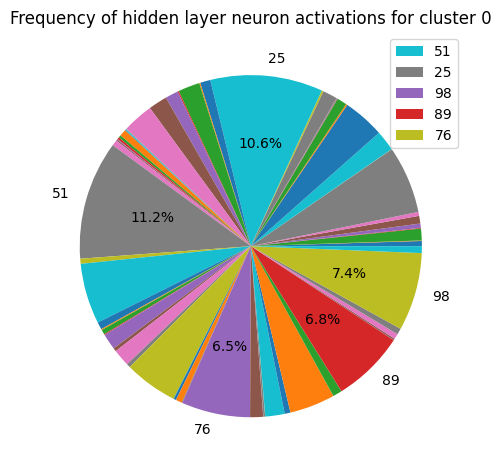

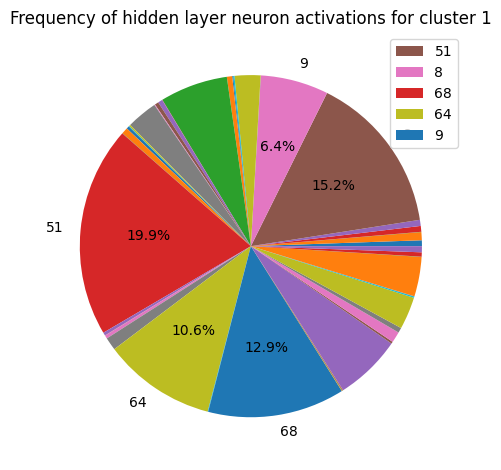

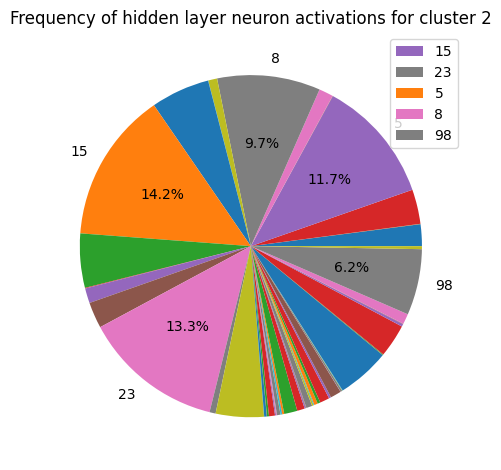

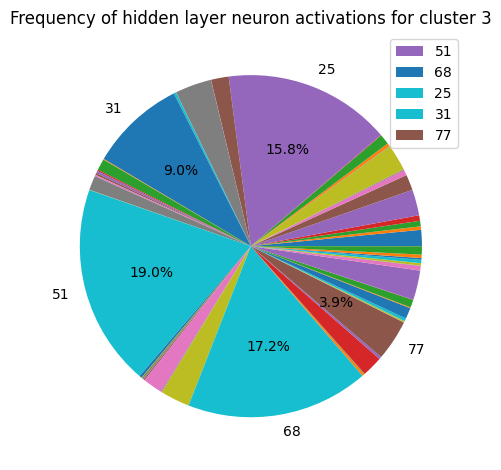

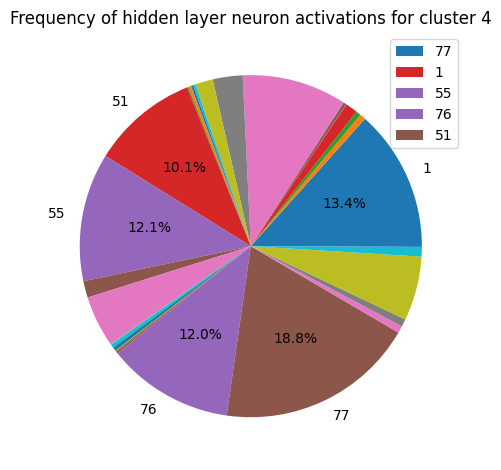

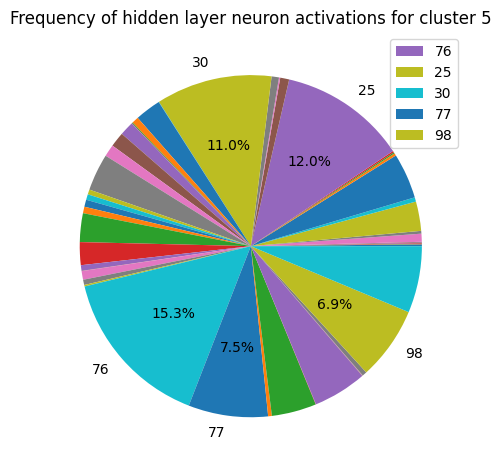

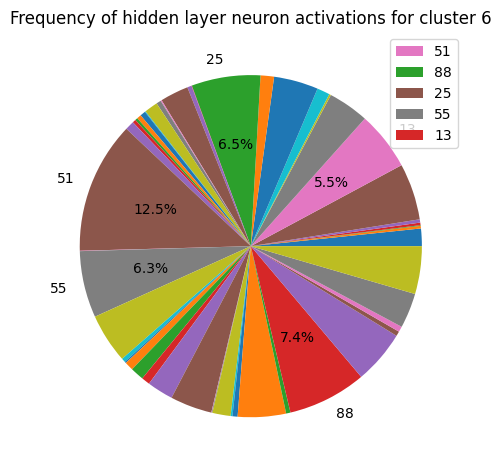

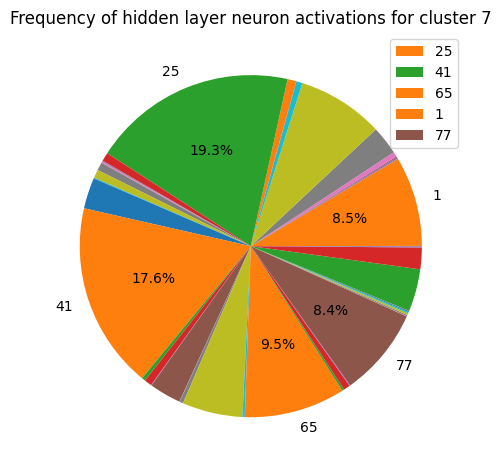

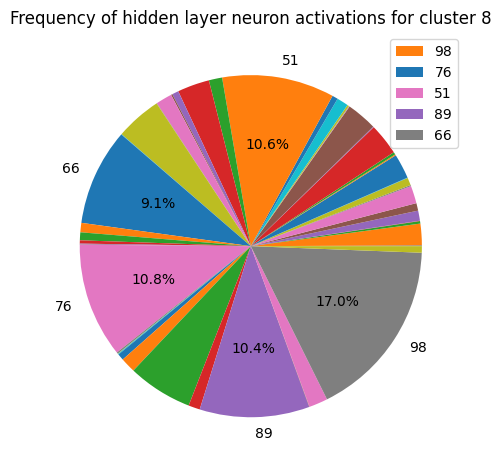

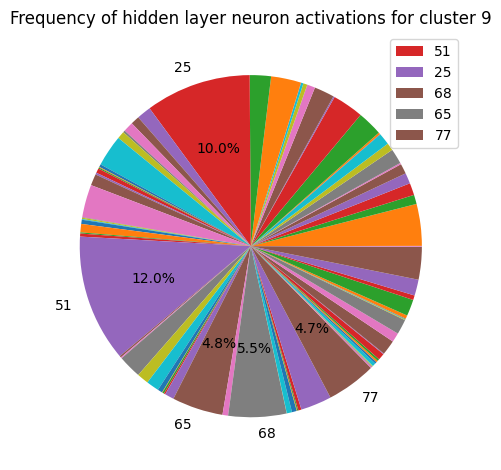

In [33]:
# plot diagramma a torta

for i in range(10):
    # Plotting pie chart
    patches, texts, autotexts = plt.pie(
        frequencies[i], labels=unique_values[i], autopct="%1.1f%%"
    )

    # Getting the indices of the top 5 frequencies
    top_indices = frequencies[i].argsort()[-5:][::-1]

    # Creating a list to keep track of the legend handles
    handles = []

    # Iterating over the patches and texts
    for j, (patch, text, autotext) in enumerate(zip(patches, texts, autotexts)):
        # Checking if the index is in the top 5
        if j in top_indices:
            # Show the label and percentage for the top 5 values
            text.set_visible(True)
            autotext.set_visible(True)
            handles.append(patch)
        else:
            # Hide the label and percentage for other values
            text.set_visible(False)
            autotext.set_visible(False)

    # Adding title and legend
    plt.title(f"Frequency of hidden layer neuron activations for cluster {i}")
    plt.legend(handles, unique_values[i][top_indices])
    plt.tight_layout()
    # Display the plot
    plt.show()

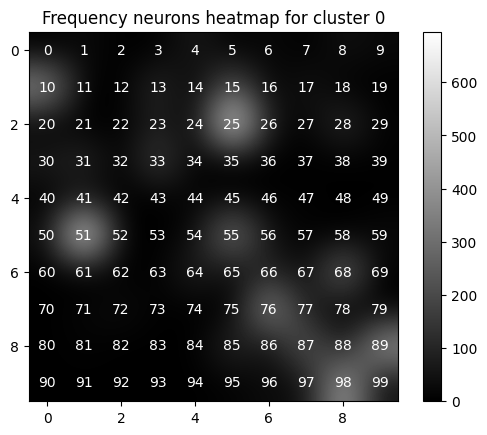

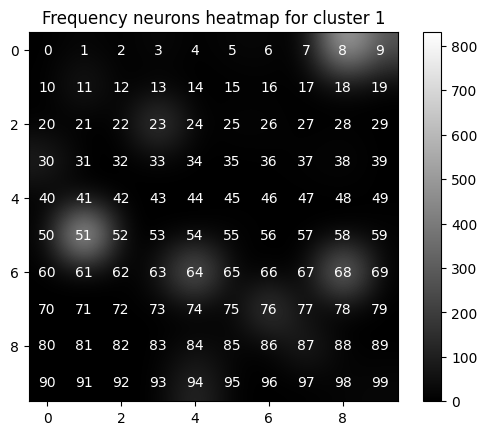

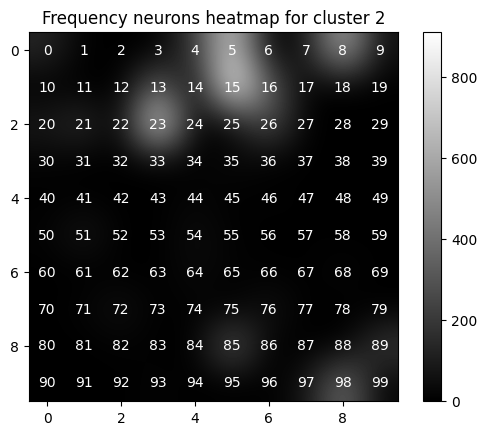

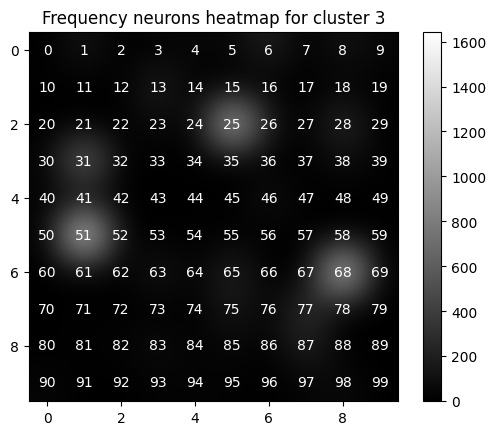

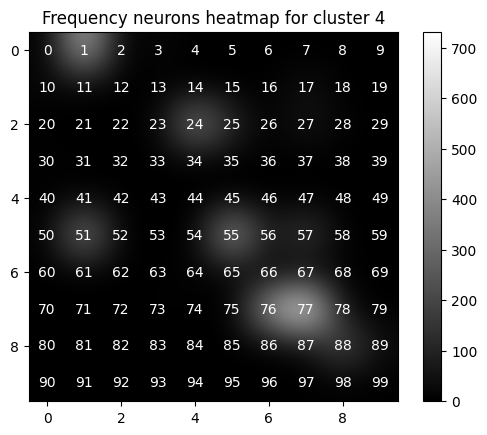

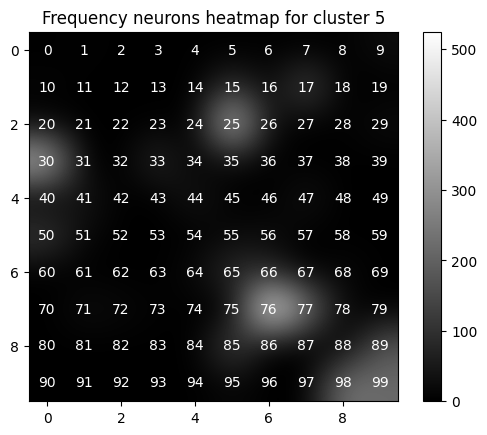

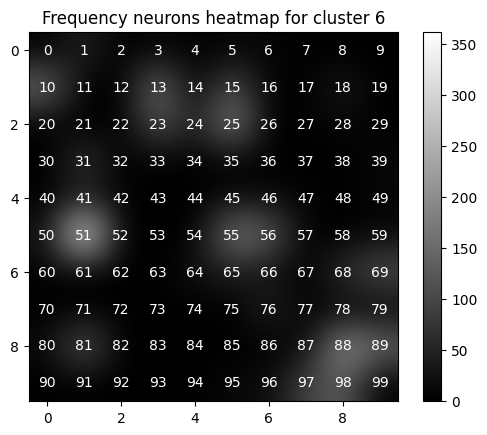

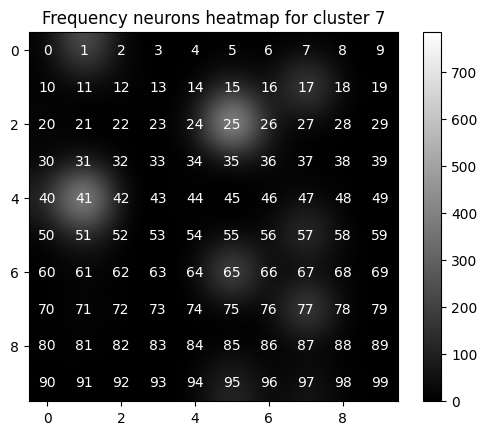

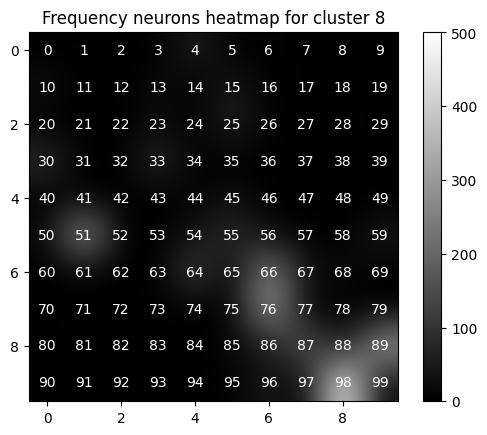

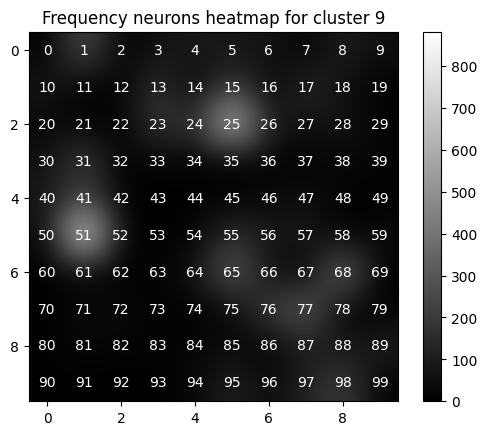

In [34]:
# plot heatmap

for i in range(10):
    # Create a 10x10 grid of frequencies
    heatmap_data = np.zeros((10, 10))
    for j, val in zip(unique_values[i], frequencies[i]):
        heatmap_data[int(j / 10), j % 10] = val

    # Create the heatmap plot with a gradient color scheme
    plt.imshow(heatmap_data, cmap="gray", interpolation="bicubic")

    # Add colorbar
    plt.colorbar()

    # Add text labels
    for x in range(10):
        for y in range(10):
            num = y * 10 + x
            plt.text(x, y, str(num), color="white", ha="center", va="center")

    plt.title(f"Frequency neurons heatmap for cluster {i}")

    # Display the plot
    plt.show()

Cerchiamo di risalire ai numeri basandoci sulle attivazioni


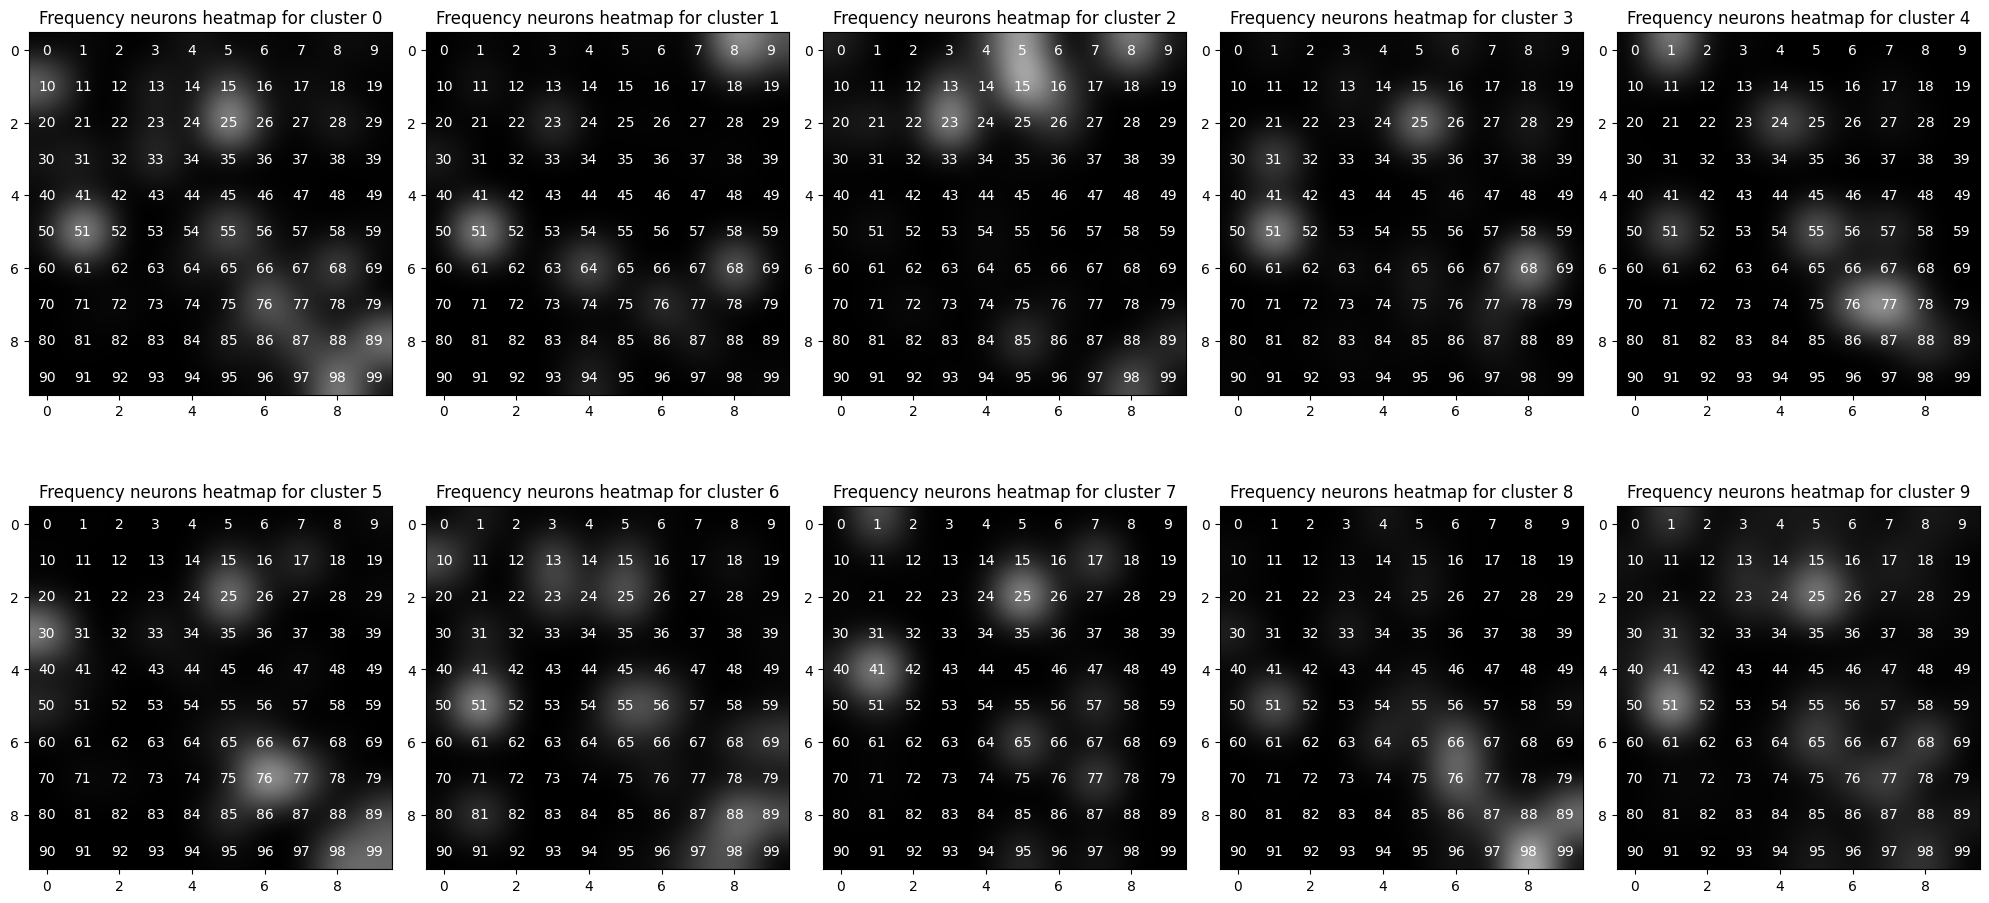

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    # Create a 10x10 grid of frequencies
    heatmap_data = np.zeros((10, 10))
    for j, val in zip(unique_values[i], frequencies[i]):
        heatmap_data[int(j / 10), j % 10] = val

    # Determine the position in the subplot grid
    row = i // 5
    col = i % 5

    # Select the appropriate subplot
    ax = axs[row, col]

    # Create the heatmap plot with a gradient color scheme
    im = ax.imshow(heatmap_data, cmap="gray", interpolation="bicubic")

    # Add text labels
    for x in range(10):
        for y in range(10):
            num = y * 10 + x
            ax.text(x, y, str(num), color="white", ha="center", va="center")

    ax.set_title(f"Frequency neurons heatmap for cluster {i}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Tipo... cluster 3 e 4 hanno attivazioni simili... andiamo a edere i veri label dentro.


In [36]:
counts_3, freq_3 = np.unique(
    predicted[indexes_from_cluster_output[3]], return_counts=True
)
counts_4, freq_4 = np.unique(
    predicted[indexes_from_cluster_output[4]], return_counts=True
)
print(counts_3, freq_3)
print(counts_4, freq_4)

[0 1 2 4 5 6 7 8 9] [  3   1   7 796   5   1  71   1 842]
[0 2 8] [770   4   4]


In [37]:
counts_0, freq_0 = np.unique(
    predicted[indexes_from_cluster_output[0]], return_counts=True
)
counts_1, freq_1 = np.unique(
    predicted[indexes_from_cluster_output[1]], return_counts=True
)
print(counts_0, freq_0)
print(counts_1, freq_1)

[0 2 3 4 5 7 8 9] [ 15 145 326   1  53   9 686   4]
[0 2 3 7 8 9] [  3   4   9 802   1  17]


0-5 funziona abbastanza:
nel cluster 0 ci sono 3 e 5 in preponderanza, e poi 8
nel cluster 5 la preponderanza è data da 3,5 e 8 ancora


In [38]:
counts_0, freq_0 = np.unique(
    predicted[indexes_from_cluster_output[0]], return_counts=True
)
counts_5, freq_5 = np.unique(
    predicted[indexes_from_cluster_output[5]], return_counts=True
)
print(counts_0, freq_0)
print(counts_5, freq_5)

[0 2 3 4 5 7 8 9] [ 15 145 326   1  53   9 686   4]
[2 3 5 7 8] [676   6   2   1   1]


In [39]:
counts_8, freq_8 = np.unique(
    predicted[indexes_from_cluster_output[8]], return_counts=True
)
counts_9, freq_9 = np.unique(
    predicted[indexes_from_cluster_output[9]], return_counts=True
)
print(counts_8, freq_8)
print(counts_9, freq_9)

# poco solo su 7-9

[0 2 3 5 6 8 9] [  1   1 562   9   1  13   1]
[0 1 2 3 4 5 6 7 8 9] [206  24 119 104 172 241 192  93 199 119]


In [40]:
counts_7, freq_7 = np.unique(
    predicted[indexes_from_cluster_output[7]], return_counts=True
)
counts_4, freq_4 = np.unique(
    predicted[indexes_from_cluster_output[4]], return_counts=True
)
print(counts_7, freq_7)
print(counts_4, freq_4)

[0 1 2 4 5 6 8] [ 13   1  18   2   1 773   5]
[0 2 8] [770   4   4]


In [41]:
for i in range(10):
    labels, freq = np.unique(
        predicted[indexes_from_cluster_output[i]], return_counts=True
    )
    print(
        f"CLUSTER {i}. Labels:{labels}. Frequency: {freq} ---> Cluster {i} associated with label {labels[np.argmax(freq)]} with prob. {100*np.max(freq)/np.sum(freq)}%"
    )

CLUSTER 0. Labels:[0 2 3 4 5 7 8 9]. Frequency: [ 15 145 326   1  53   9 686   4] ---> Cluster 0 associated with label 8 with prob. 55.367231638418076%
CLUSTER 1. Labels:[0 2 3 7 8 9]. Frequency: [  3   4   9 802   1  17] ---> Cluster 1 associated with label 7 with prob. 95.93301435406698%
CLUSTER 2. Labels:[1 2 3 4 6 7 8 9]. Frequency: [1115   67   16    1    1   59   18    6] ---> Cluster 2 associated with label 1 with prob. 86.90568978955572%
CLUSTER 3. Labels:[0 1 2 4 5 6 7 8 9]. Frequency: [  3   1   7 796   5   1  71   1 842] ---> Cluster 3 associated with label 9 with prob. 48.75506658946149%
CLUSTER 4. Labels:[0 2 8]. Frequency: [770   4   4] ---> Cluster 4 associated with label 0 with prob. 98.97172236503856%
CLUSTER 5. Labels:[2 3 5 7 8]. Frequency: [676   6   2   1   1] ---> Cluster 5 associated with label 2 with prob. 98.54227405247813%
CLUSTER 6. Labels:[0 3 5 8]. Frequency: [  1   2 562  16] ---> Cluster 6 associated with label 5 with prob. 96.72977624784853%
CLUSTER 7. L

## Try a simply clustering algorithm instead of mapper algorithm (TDA)


In [42]:
from sklearn.cluster import KMeans
import umap
from sklearn.cluster import DBSCAN

kmeans = KMeans(n_clusters=10)
umap_clustering = umap.UMAP(n_components=10)
dbscan = DBSCAN()

kmeans.fit_transform(output_activations)
kmeans_labels = kmeans.labels_
# umap_clustering.fit_transform(output_activations)
# dbscan_labels = dbscan.fit_predict(output_activations)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
def ClusterIndices(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

In [44]:
kmeans_indexes = []
# dbscan_indexes = []
for i in range(10):
    kmeans_cluster = ClusterIndices(i, kmeans_labels)
    kmeans_indexes.append(kmeans_cluster)
    # dbscan_cluster = ClusterIndices(i, dbscan_labels)

    labels, freq = np.unique(predicted[kmeans_cluster[i]], return_counts=True)
    print(
        f"KMEANS CLUSTER {i}. Labels:{labels}. Frequency: {freq} ---> Cluster {i} associated with label {labels[np.argmax(freq)]} with prob. {100*np.max(freq)/np.sum(freq)}%"
    )
    # labels, freq = np.unique(predicted[dbscan_cluster[i]], return_counts=True)
    # print( f"DBSCAN CLUSTER {i}. Labels:{labels}. Frequency: {freq} ---> Cluster {i} associated with label {labels[np.argmax(freq)]} with prob. {100*np.max(freq)/np.sum(freq)}%")

KMEANS CLUSTER 0. Labels:[1]. Frequency: [1] ---> Cluster 0 associated with label 1 with prob. 100.0%
KMEANS CLUSTER 1. Labels:[0]. Frequency: [1] ---> Cluster 1 associated with label 0 with prob. 100.0%
KMEANS CLUSTER 2. Labels:[9]. Frequency: [1] ---> Cluster 2 associated with label 9 with prob. 100.0%
KMEANS CLUSTER 3. Labels:[3]. Frequency: [1] ---> Cluster 3 associated with label 3 with prob. 100.0%
KMEANS CLUSTER 4. Labels:[3]. Frequency: [1] ---> Cluster 4 associated with label 3 with prob. 100.0%
KMEANS CLUSTER 5. Labels:[6]. Frequency: [1] ---> Cluster 5 associated with label 6 with prob. 100.0%
KMEANS CLUSTER 6. Labels:[7]. Frequency: [1] ---> Cluster 6 associated with label 7 with prob. 100.0%
KMEANS CLUSTER 7. Labels:[2]. Frequency: [1] ---> Cluster 7 associated with label 2 with prob. 100.0%
KMEANS CLUSTER 8. Labels:[4]. Frequency: [1] ---> Cluster 8 associated with label 4 with prob. 100.0%
KMEANS CLUSTER 9. Labels:[2]. Frequency: [1] ---> Cluster 9 associated with label 

In [45]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# serve per plottare sulla grif cin subplot
def plot_manifold_(
    data, predicted, title="", n_components=3, algorithm="umap", ax=None
):
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data)

    if algorithm == "umap":
        reducer = umap.UMAP(n_components=n_components)
    elif algorithm == "KernelPCA":
        reducer = KernelPCA(n_components=n_components)
    else:
        raise ValueError("Enter one of:[umap, KernelPCA]")

    output_data = reducer.fit_transform(data_normalized)

    if n_components == 2:
        if ax is None:
            ax = plt.gca()
        ax.scatter(output_data[:, 0], output_data[:, 1], c=predicted)
    else:
        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection=Axes3D.name)
        else:
            fig = ax.figure

        # Plot the data points
        ax.scatter(output_data[:, 0], output_data[:, 1], output_data[:, 2], c=predicted)

    plt.title(title)

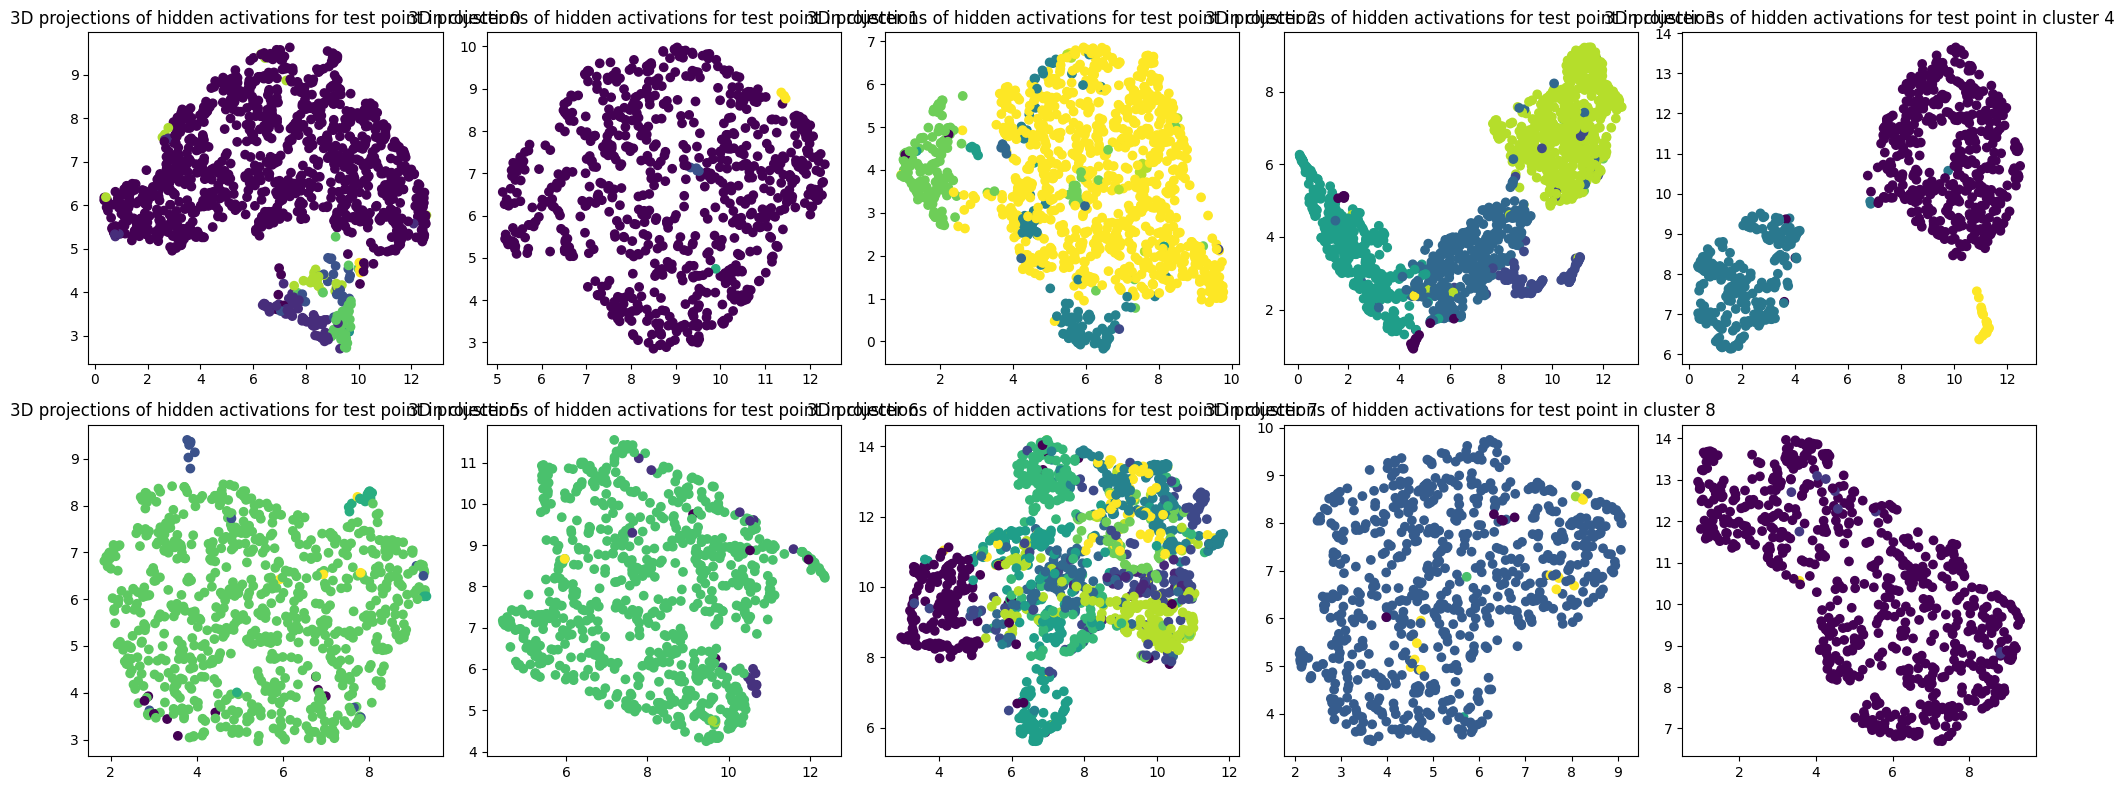

In [46]:
import matplotlib.pyplot as plt


hidden_activ_per_clusters = []

fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(10):
    kmeans_indexes[i]

    # seleziono le hidden activation dei test point corrispondenti
    hidden_activ_per_clusters.append(hidden_activations[kmeans_indexes[i]])

    ax = axs[i // 5, i % 5]
    ax.set_title(f"3D projections of hidden activations for test point in cluster {i}")
    plot_manifold_(
        data=hidden_activations[kmeans_indexes[i]],
        title="",
        predicted=predicted[kmeans_indexes[i]],
        n_components=2,
        algorithm="umap",
        ax=ax,
    )

plt.tight_layout()
plt.show()

In [47]:
KMEANS = hidden_activ_per_clusters

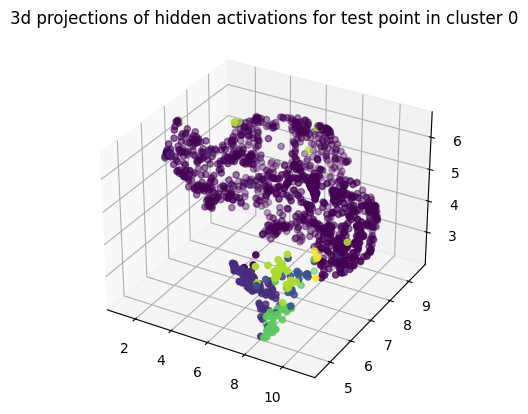

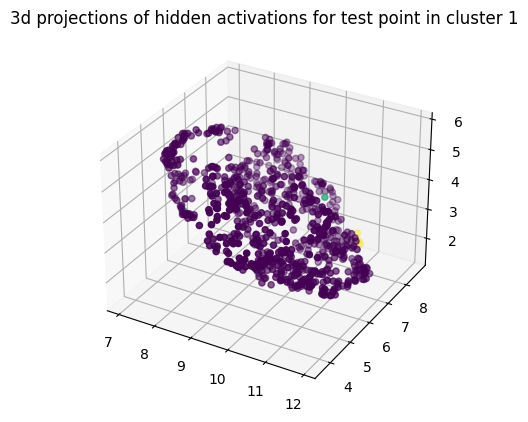

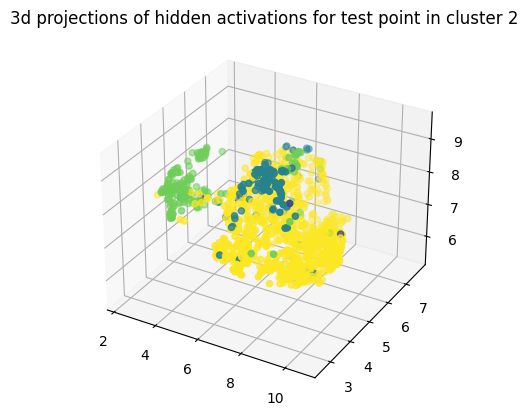

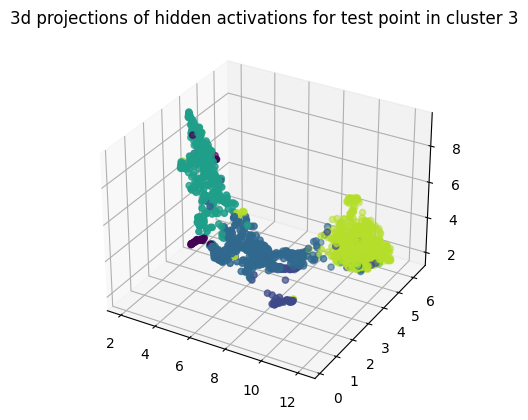

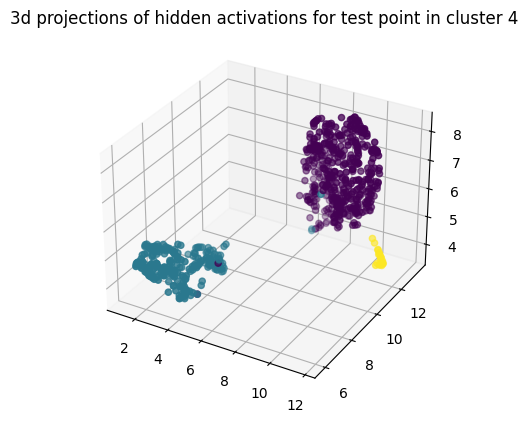

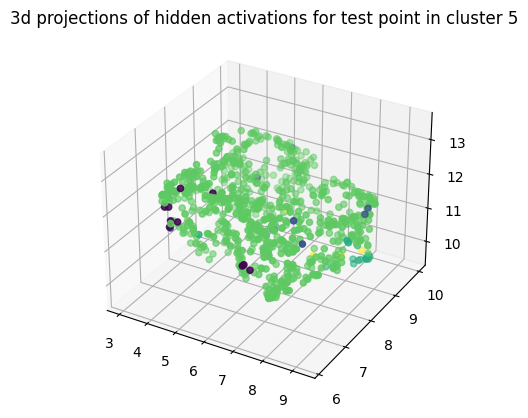

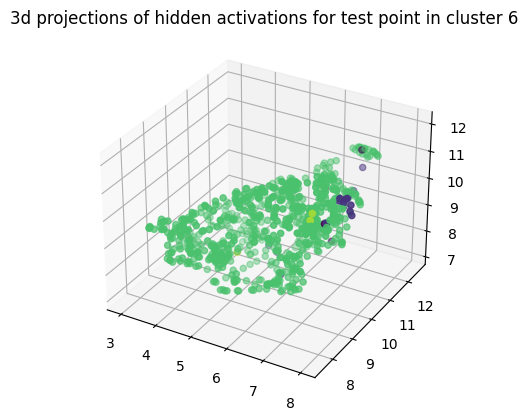

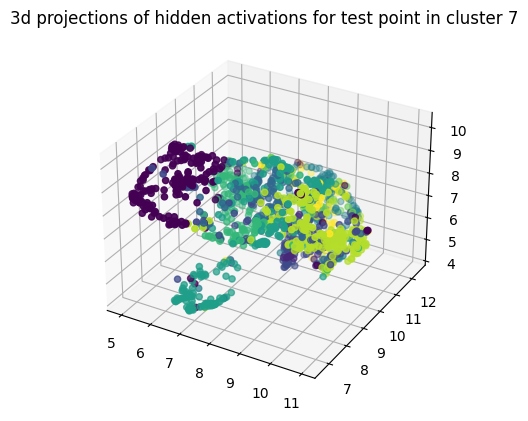

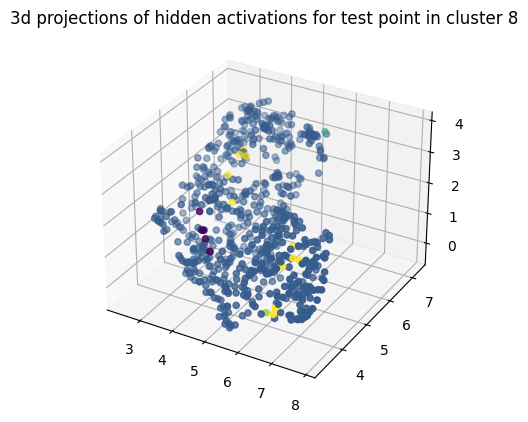

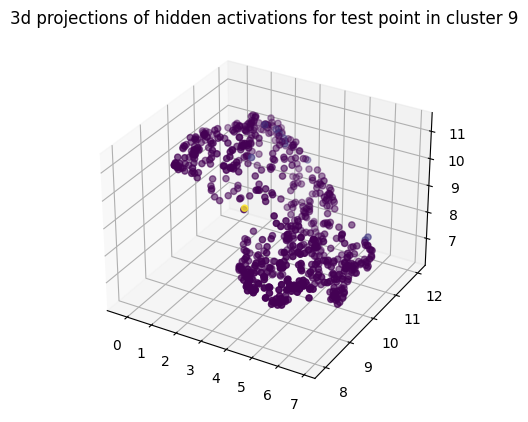

In [48]:
# store the hidden activations for each of the 10 cluster:
hidden_activ_per_clusters = []

for i in range(10):
    kmeans_indexes[i]

    # seleziono le hidden activation dei test point corrispondenti
    hidden_activ_per_clusters.append(hidden_activations[kmeans_indexes[i]])

    plot_manifold(
        data=hidden_activations[kmeans_indexes[i]],
        title=f"3d projections of hidden activations for test point in cluster {i}",
        predicted=predicted[kmeans_indexes[i]],
    )
    plt.show()

In [49]:
DICT = [[] for _ in range(10)]
for i in range(10):
    for j in range(hidden_activ_per_clusters[i].shape[0]):
        DICT[i].append(hidden_activ_per_clusters[i][j].argsort()[-5:][::-1])

In [50]:
DICT_KMEANS = DICT

In [51]:
unique_values = []  # gli interi qui dentro corrispondono all'ID di un neurone
frequencies = []

for i in range(10):
    values, counts = np.unique(np.stack(DICT[i]).flatten(), return_counts=True)
    unique_values.append(values)
    frequencies.append(counts)

In [52]:
LIST = []
for i in range(10):
    idxs = list(frequencies[i].argsort()[-5:][::-1])
    LIST.append(unique_values[i][idxs])

LIST

[array([15, 23,  5,  8, 98]),
 array([77,  1, 55, 76, 24]),
 array([51, 68, 25, 31, 87]),
 array([51, 25, 98, 89, 10]),
 array([98, 51, 89, 76, 66]),
 array([25, 41, 65,  1, 77]),
 array([51,  8, 68, 64, 76]),
 array([51, 25, 68, 77, 65]),
 array([25, 68, 51, 31, 77]),
 array([76, 25, 30, 77, 98])]

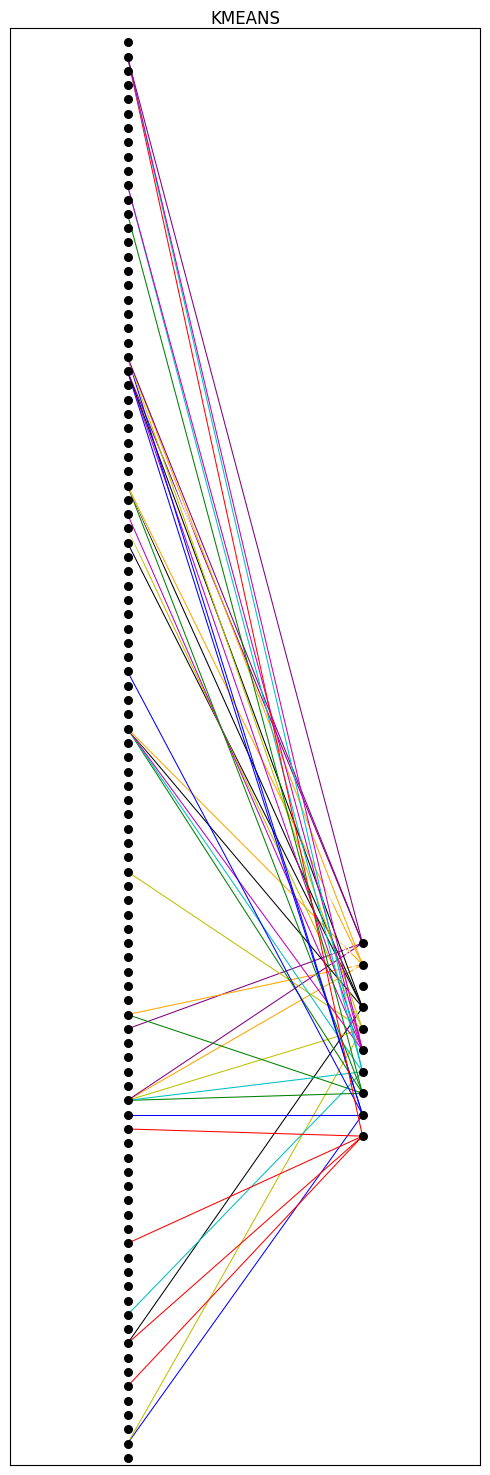

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes with positions (0, 1) to (99, 1)
for x in range(100):
    G.add_node(x, pos=(0, 2 * x))

# Add nodes with positions (0, 0) to (9, 0)
for x in range(10):
    G.add_node(x + 100, pos=(1, 45 + 3 * x))

# Extract positions from node attributes
node_positions = {node: data["pos"] for node, data in G.nodes(data=True)}

colors = ["r", "b", "g", "c", "m", "y", "k", "w", "orange", "purple"]
for i, edges in enumerate(LIST):
    for edge in edges:
        G.add_edge(100 + i, edge, color=colors[i])

colors = nx.get_edge_attributes(G, "color").values()

# Draw the graph
plt.figure(figsize=(5, 15))
nx.draw_networkx_nodes(G, pos=node_positions, node_color="black", node_size=30)
nx.draw_networkx_edges(G, pos=node_positions, edge_color=colors, width=0.75)

# Set axis labels and limits
plt.ylim(-1, 200)
plt.xlim(-0.5, 1.5)

# Show the graph
plt.suptitle("KMEANS")

plt.tight_layout()
plt.show()

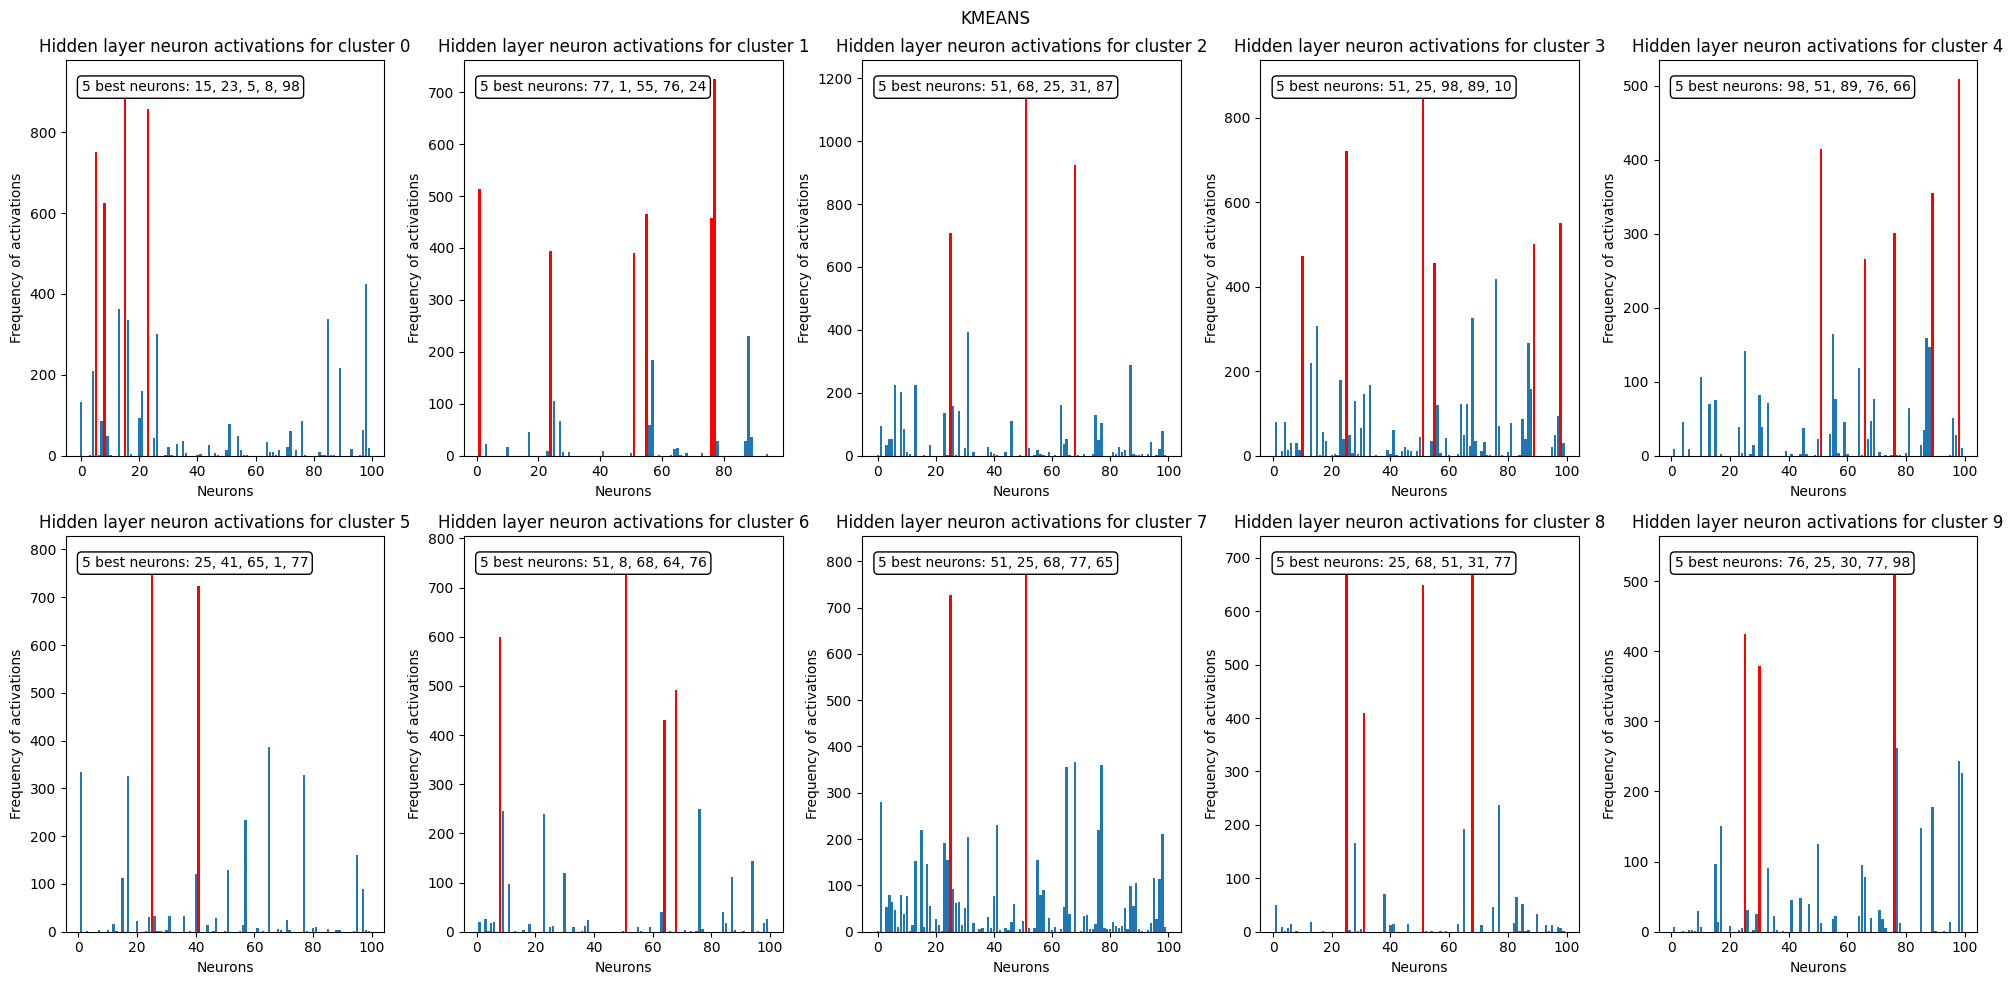

In [54]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    # Determine the position in the subplot grid
    row = i // 5
    col = i % 5

    # Select the appropriate subplot
    ax = axs[row, col]

    threshold = (1 / 2) * (max(frequencies[i]) - min(frequencies[i]))

    # Plotting bar chart
    ax.bar(unique_values[i], frequencies[i])

    # Highlight the bar that reaches or exceeds the threshold
    for j, freq in enumerate(frequencies[i]):
        if freq >= threshold:
            ax.bar(unique_values[i][j], freq, color="red")

    # Adding labels and title
    ax.set_xlabel("Neurons")
    ax.set_ylabel("Frequency of activations")
    ax.set_title(f"Hidden layer neuron activations for cluster {i}")

    # Getting the indices of the five most frequent neurons
    top_indices = frequencies[i].argsort()[-5:][::-1]
    top_neurons = unique_values[i][top_indices]

    # Creating the text to display
    text = "5 best neurons: " + ", ".join(map(str, top_neurons))

    # Adding the text to the plot
    ax.text(
        0.05,
        0.95,
        text,
        transform=ax.transAxes,
        ha="left",
        va="top",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round"),
    )

plt.suptitle("KMEANS")

# Adjust the spacing between subplots
plt.tight_layout()


# Display the plot
plt.show()

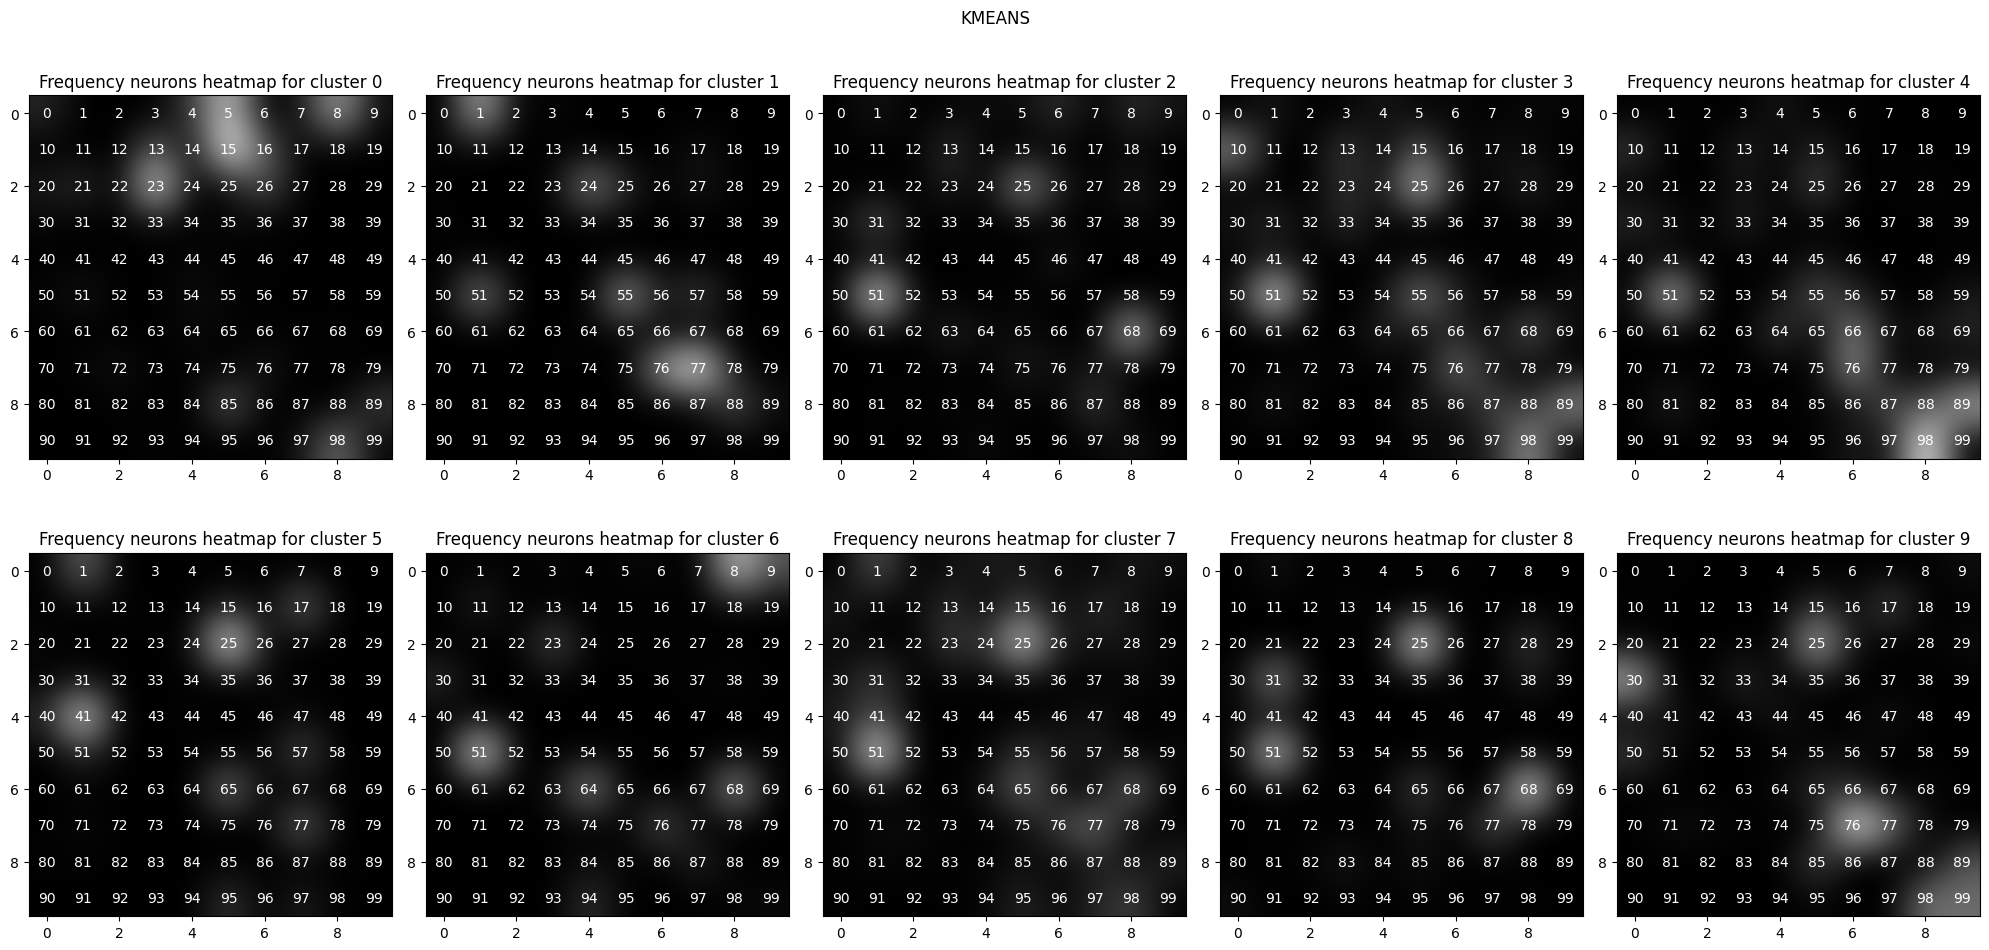

In [55]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    # Create a 10x10 grid of frequencies
    heatmap_data = np.zeros((10, 10))
    for j, val in zip(unique_values[i], frequencies[i]):
        heatmap_data[int(j / 10), j % 10] = val

    # Determine the position in the subplot grid
    row = i // 5
    col = i % 5

    # Select the appropriate subplot
    ax = axs[row, col]

    # Create the heatmap plot with a gradient color scheme
    im = ax.imshow(heatmap_data, cmap="gray", interpolation="bicubic")

    # Add text labels
    for x in range(10):
        for y in range(10):
            num = y * 10 + x
            ax.text(x, y, str(num), color="white", ha="center", va="center")

    ax.set_title(f"Frequency neurons heatmap for cluster {i}")

# Adjust the spacing between subplots
plt.suptitle("KMEANS")
plt.tight_layout()

# Display the plot
plt.show()

In [66]:
MAPPER[2][0]

array([ 2.8372982e+00, -3.0862491e+00, -2.3873061e-01, -2.5732992e+00,
        4.2526108e-01,  3.7812455e+00, -5.4424649e-01,  2.5239549e+00,
        2.1625986e+00,  1.0885741e+00,  1.1288500e-02, -4.0611088e-01,
       -6.4107138e-01,  2.4863856e+00, -3.4001234e-01,  3.5827262e+00,
        2.5155187e+00,  1.1285251e+00,  5.2524012e-02,  1.5504718e+00,
        2.2299950e+00,  1.4890376e+00, -7.3404384e-01,  3.3228509e+00,
       -1.0403085e-01,  6.5935194e-01,  2.5764272e+00, -4.2227387e-01,
       -1.0499040e-03,  3.5936928e-01,  3.5427216e-01, -1.0458982e-01,
       -3.4851643e-01,  1.2539380e+00,  2.1213484e+00,  2.3910294e+00,
        1.6006352e+00, -1.8319277e+00, -4.8124218e-01, -4.1387045e-01,
        1.7965828e+00,  1.2814063e+00,  1.5411032e+00,  1.4013532e-01,
        1.9076362e+00,  2.3287150e-01,  1.8240688e+00,  6.1561537e-01,
        7.7873006e-02, -8.1836861e-01,  1.2838207e+00,  1.3114887e+00,
        1.6211993e+00,  1.3800944e+00,  1.2226812e+00,  7.0817959e-01,
      

In [64]:
KMEANS[0]

array([[ 2.8372982 , -3.086249  , -0.23873061, ...,  1.7387942 ,
         1.5563245 ,  0.34643635],
       [ 3.3060985 , -4.2947707 , -0.15997611, ...,  1.6414782 ,
         1.9319007 ,  0.88218343],
       [ 3.1123648 , -3.8014455 , -0.26748216, ...,  3.5396323 ,
         5.0938897 ,  1.1474737 ],
       ...,
       [ 3.1346855 , -3.402441  , -0.27472568, ...,  0.8841819 ,
         2.2140422 ,  0.8526469 ],
       [ 2.7807488 , -4.2812405 , -0.30549416, ...,  2.3416183 ,
         3.5731742 ,  1.8333484 ],
       [ 3.7024205 , -5.009214  , -0.14681038, ...,  2.4306586 ,
         2.5824666 ,  1.4013586 ]], dtype=float32)